---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [136]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
bike = pd.read_csv("sbikedata.csv", sep = ",", encoding = "UTF-8")

In [144]:
bike["date"] = pd.to_datetime(bike.date, format='%Y-%m-%d')

In [147]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


In [149]:
bike["day"] = bike["date"].dt.day

In [151]:
bike["month"] = bike["date"].dt.month

In [152]:
bike.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,day,month
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,1,4
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,1,4
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,1,4
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,1,4
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,1,4


In [78]:
bike.tail()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

In [8]:
bike

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


- 가설 1
    ㅇ 귀무가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 없다.
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.

- 가설 2 :
    ㅇ 귀무가설 : 오존수치와 따릉이 대여량 간에는 연관성이 없다.
    ㅇ 대립가설 : 오존수치와 따릉이 대여량 간에는 연관성이 있다.

- 가설 3 :
    ㅇ 귀무가설 : 시정과 따릉이 대여량 간에는 연관성이 없다.
    ㅇ 대립가설 : 시정과 따릉이 대여량 간에는 연관성이 있다.

- 가설 4 :
    ㅇ 귀무가설 : 미세먼지 + 초미세먼지와 따릉이 대여량 간에는 연관성이 없다.    
    ㅇ 대립가설 : 미세먼지 + 초미세먼지와 따릉이 대여량 간에는 연관성이 있다.

- 가설 5 :
    ㅇ 귀무가설 : 온도 + 습도와 따릉이 대여량 간에는 연관성이 없다.
    ㅇ 대립가설 : 온도 + 습도와 따릉이 대여량 간에는 연관성이 있다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

2. 변수가 수치형인지 범주형인지
- 범주형, int형 데이터

In [6]:
#변수의 자료형을 확인해보세요.
bike["hour"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [29]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
bike["hour"].value_counts()

1     243
14    243
23    243
22    243
21    243
20    243
19    243
18    243
17    243
16    243
15    243
13    243
12    243
11    243
10    243
9     243
8     243
7     243
5     243
0     243
2     242
6     242
3     242
4     241
Name: hour, dtype: int64

In [73]:
bike["hour"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int64)

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요.

In [10]:
bike["hour"].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

In [4]:
#변수의 분포를 확인해보세요.

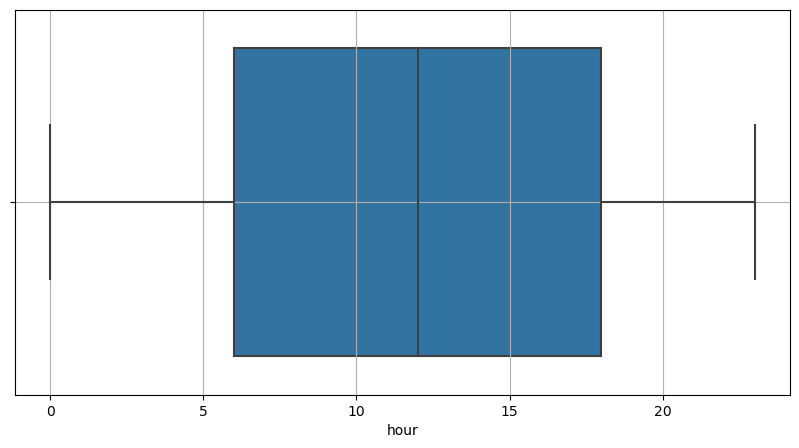

In [24]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "hour", data = bike)
plt.grid()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

#위 정보로부터 파악하신 내용을 정리해보세요.
- 이용자의 반 이상이 일과시간(6시 ~ 18시)에 분포되어 있다

7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.
- 수치형 변수, float

2. 변수가 수치형인지 범주형인지


In [1]:
#변수의 자료형을 확인해보세요.

In [30]:
bike["temperature"]

0       13.1
1       12.4
2       13.1
3       13.0
4       13.0
        ... 
5822     9.3
5823     8.4
5824     8.6
5825     8.2
5826     7.9
Name: temperature, Length: 5827, dtype: float64

3. 변수의 결측치 존재 여부 및 조치방안

In [2]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [72]:
bike["temperature"].unique()

array([13.1, 12.4, 13. , 12.6, 12. , 14. , 16.2, 18.2, 20.2, 21.7, 22.6,
       23.6, 23.2, 23.5, 23. , 22.3, 20.6, 19.2, 18.1, 16.5, 15.4, 14.6,
       14.2, 13.7, 12.9, 12.8, 12.7, 13.6, 17.4, 18.9, 20.7, 21.6, 22. ,
       22.9, 21. , 19.9, 19.4, 19. , 18.8, 18.4, 18. , 17.7, 17.6, 17.3,
       17.5, 16.8, 15.8, 14.9, 14.8, 14.5, 14.4, 14.3, 13.5, 12.5, 11.7,
       11.4, 10.9, 10.5, 10.3, 10.4, 10.2,  9.7,  9.5,  9.6, 10. , 10.7,
       11.6, 14.7, 15.5, 15. , 12.3,  9. ,  8.1,  7.4,  6.8,  6.5,  6.1,
        5.5,  5.4,  7.9, 16.6, 17.9, 15.9, 13.3, 10.6, 10.8,  9.4, 16.1,
       17. , 18.6, 16. , 15.1, 12.1,  8.7,  8.2,  8.3, 16.7, 19.3, 20.4,
       19.7, 13.8, 11.3, 10.1,  8.9,  7.6,  7.2, 13.9, 17.8, 11.2,  8.6,
        7.8,  7.7,  8.8, 17.2, 19.5, 18.5,  9.8,  9.1,  8. , 15.2, 18.3,
       11.8,  8.4, 12.2, 17.1, 20.8, 21.2, 21.5, 16.9, 11. , 11.1, 11.9,
       11.5,  5.7,  5. ,  4.6,  3.9,  3.4,  3.1,  7.1,  6.6,  6.4,  6.7,
        6.9,  7. ,  7.3,  6.2, 13.2,  5.8,  5.6,  8

In [33]:
bike["temperature"].nunique()

377

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [35]:
bike["temperature"].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인

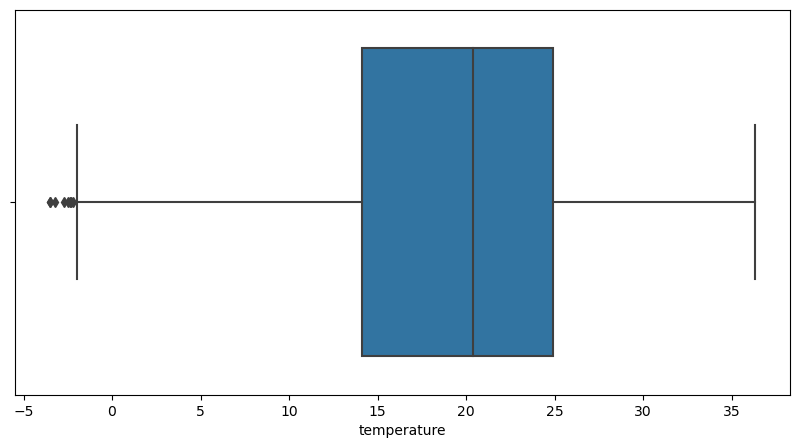

In [39]:
#변수의 분포를 확인해보세요.
plt.figure(figsize = (10, 5))
sns.boxplot(x = bike["temperature"])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

평균 14 ~ 25도에 이용을 주로 하고 영하의 날씨나 고온의 날씨에도 이용하는 사용자가 있다

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

강우 여부 : 0이면 맑고, 1이면 비

2. 변수가 수치형인지 범주형인지
0 또는 1로 나뉘는 범주형, 자료형은 int

In [ ]:
#변수의 자료형을 확인해보세요.

In [40]:
bike["precipitation"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [41]:
bike["precipitation"].value_counts()

0    5387
1     440
Name: precipitation, dtype: int64

In [71]:
bike["precipitation"].unique()

array([0, 1], dtype=int64)

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [42]:
bike["precipitation"].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

In [1]:
#변수의 분포를 확인해보세요.

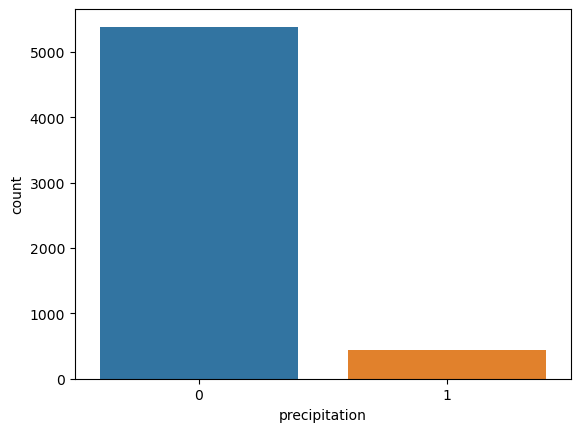

In [45]:
sns.countplot(x = bike["precipitation"])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

거의 맑은 날씨에 이용하고 약 7%는 비오는 날에도 이용했다

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

수치형, float 자료형

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [46]:
bike["windspeed"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [47]:
bike["windspeed"].value_counts()

2.3    255
2.2    246
2.1    242
1.9    239
1.7    235
      ... 
6.9      1
5.8      1
6.8      1
6.4      1
6.2      1
Name: windspeed, Length: 72, dtype: int64

In [70]:
print(sorted(bike["windspeed"].unique()), sep = " ")

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 8.1, 8.3]


In [48]:
bike["windspeed"].nunique()

72

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [49]:
bike["windspeed"].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

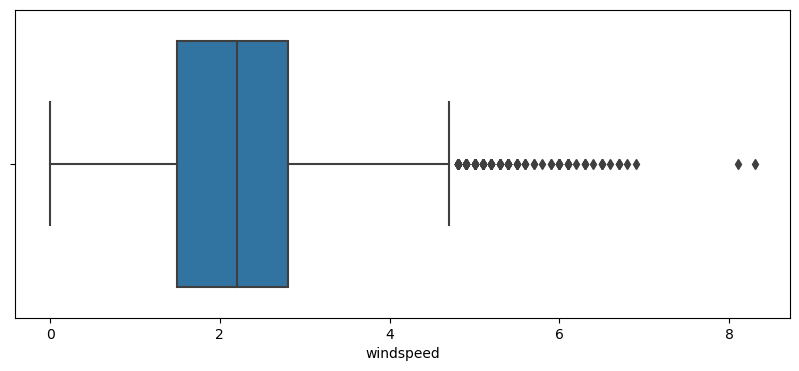

In [58]:
plt.figure(figsize = (10, 4))
sns.boxplot(x = "windspeed", data = bike)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

약 75%는 바람이 3 m/s 이하일 때 많이 이용했다

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

수치형 변수, 자료형은 int

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [59]:
bike["humidity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [60]:
bike["humidity"].value_counts()

70    142
76    138
75    128
63    127
77    127
     ... 
24      4
20      3
21      2
22      2
19      1
Name: humidity, Length: 82, dtype: int64

In [61]:
bike["humidity"].nunique()

82

In [62]:
bike["humidity"].unique()

array([ 49,  53,  43,  44,  45,  46,  38,  31,  25,  21,  20,  19,  22,
        24,  27,  33,  40,  41,  39,  42,  34,  29,  26,  30,  35,  36,
        51,  54,  57,  59,  60,  62,  79,  89,  94,  96,  98,  97,  95,
        92,  91,  93,  86,  80,  75,  67,  61,  50,  52,  55,  69,  71,
        72,  78,  66,  28,  23,  37,  48,  58,  64,  63,  32,  56,  70,
        77,  47,  68,  99,  76,  65,  74,  83,  85,  87,  81,  84,  73,
        88,  82,  90, 100], dtype=int64)

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [74]:
bike["humidity"].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

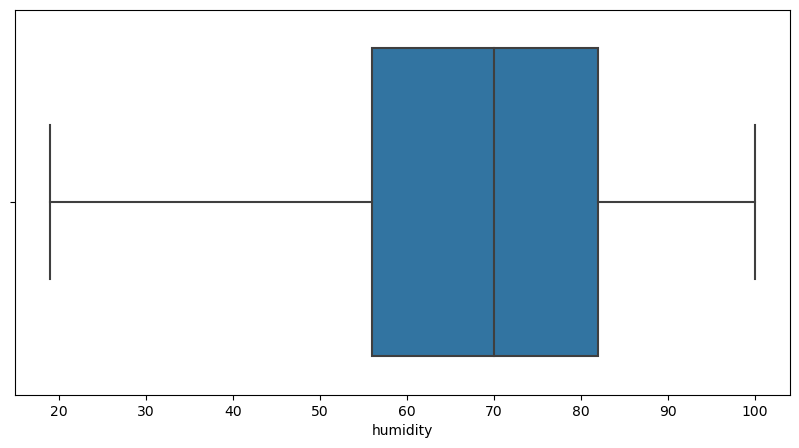

In [77]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "humidity", data = bike)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

4월에서 11월까지 데이터라 습도가 높은 우리나라 기후 영향이 많아 보인다

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.
- 수치형 변수, int 자료형

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [80]:
bike["visibility"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: visibility
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [81]:
bike["visibility"].value_counts()

2000    4218
1996       8
1984       7
1992       7
1997       6
        ... 
1756       1
313        1
848        1
1406       1
1250       1
Name: visibility, Length: 1032, dtype: int64

In [82]:
bike["visibility"].unique()

array([2000,  521,  206, ..., 1193, 1233, 1250], dtype=int64)

In [83]:
bike["visibility"].nunique()

1032

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [84]:
bike["visibility"].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

#변수의 분포를 확인해보세요.

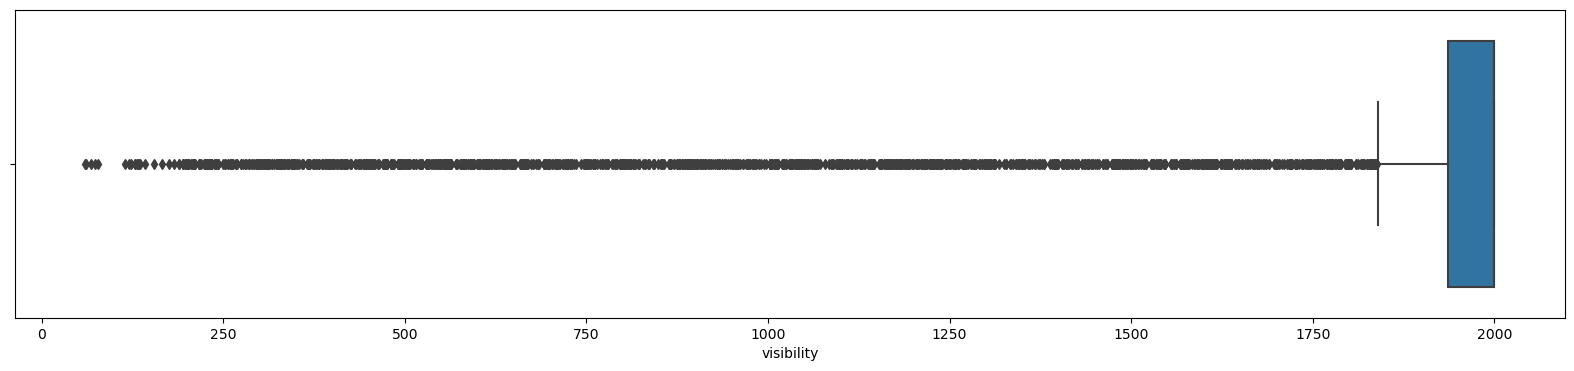

In [87]:
plt.figure(figsize = (20, 4))
sns.boxplot(x = "visibility", data = bike)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

왼쪽 펜스 값이 1935 - 65 = 1870
시정거리가 대부분 18.7km 이상일 때 많이 이용했다????????????????????????

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

숫자형 변수, float 자료형

2. 변수가 수치형인지 범주형인지

In [ ]:
#변수의 자료형을 확인해보세요.

In [88]:
bike["ozone"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5699 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [89]:
bike["ozone"].value_counts()

0.002    177
0.031    170
0.034    162
0.029    161
0.032    160
        ... 
0.115      1
0.099      1
0.116      1
0.110      1
0.106      1
Name: ozone, Length: 109, dtype: int64

In [90]:
bike["ozone"].unique()

array([0.002, 0.003, 0.023, 0.028, 0.008, 0.009, 0.018, 0.027, 0.032,
       0.033, 0.038, 0.042, 0.044, 0.045, 0.043, 0.039, 0.037, 0.036,
       0.034, 0.04 , 0.035, 0.041, 0.025, 0.01 , 0.015, 0.006, 0.022,
       0.019, 0.03 , 0.026, 0.021, 0.017, 0.031, 0.029, 0.024, 0.02 ,
       0.016, 0.004, 0.049, 0.053, 0.055, 0.059, 0.06 , 0.051, 0.046,
       0.012, 0.013, 0.014, 0.047, 0.05 , 0.058, 0.052, 0.007, 0.056,
         nan, 0.066, 0.057, 0.011, 0.054, 0.065, 0.067, 0.07 , 0.077,
       0.072, 0.005, 0.064, 0.068, 0.071, 0.061, 0.074, 0.069, 0.048,
       0.063, 0.079, 0.106, 0.104, 0.085, 0.075, 0.081, 0.073, 0.08 ,
       0.062, 0.078, 0.088, 0.107, 0.11 , 0.116, 0.087, 0.082, 0.097,
       0.099, 0.094, 0.086, 0.083, 0.09 , 0.093, 0.084, 0.076, 0.089,
       0.1  , 0.137, 0.115, 0.092, 0.098, 0.103, 0.096, 0.111, 0.118,
       0.101, 0.001])

In [98]:
#nan 값은 중위 값으로 채운다
bike["ozone"].fillna(bike["ozone"].mean(), inplace = True)

In [99]:
bike["ozone"].unique()

array([0.002     , 0.003     , 0.023     , 0.028     , 0.008     ,
       0.009     , 0.018     , 0.027     , 0.032     , 0.033     ,
       0.038     , 0.042     , 0.044     , 0.045     , 0.043     ,
       0.039     , 0.037     , 0.036     , 0.034     , 0.04      ,
       0.035     , 0.041     , 0.025     , 0.01      , 0.015     ,
       0.006     , 0.022     , 0.019     , 0.03      , 0.026     ,
       0.021     , 0.017     , 0.031     , 0.029     , 0.024     ,
       0.02      , 0.016     , 0.004     , 0.049     , 0.053     ,
       0.055     , 0.059     , 0.06      , 0.051     , 0.046     ,
       0.012     , 0.013     , 0.014     , 0.047     , 0.05      ,
       0.058     , 0.052     , 0.007     , 0.056     , 0.03181137,
       0.066     , 0.057     , 0.011     , 0.054     , 0.065     ,
       0.067     , 0.07      , 0.077     , 0.072     , 0.005     ,
       0.064     , 0.068     , 0.071     , 0.061     , 0.074     ,
       0.069     , 0.048     , 0.063     , 0.079     , 0.106  

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [102]:
bike["ozone"].describe()

count    5827.000000
mean        0.031811
std         0.018075
min         0.001000
25%         0.020000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

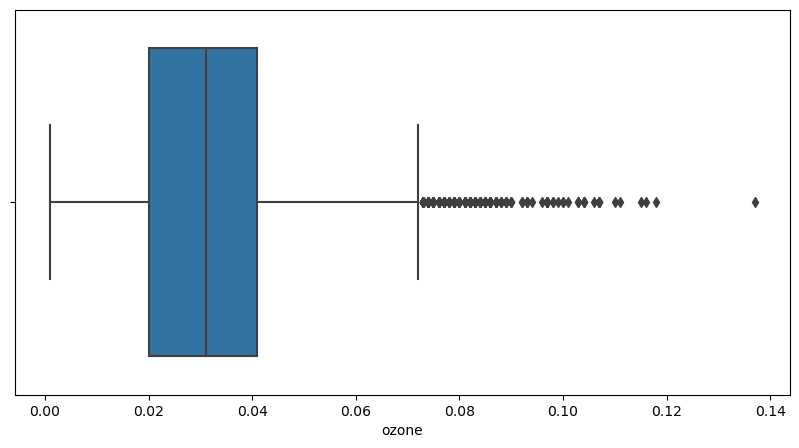

In [104]:
#변수의 분포를 확인해보세요.
plt.figure(figsize = (10, 5))
sns.boxplot(x = "ozone", data = bike)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

75%는 오존수치가 0.041 미만일 때 많이 이용했다

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

수치형, float

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [105]:
bike["PM10"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5725 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [106]:
bike["PM10"].value_counts()

18.0     181
22.0     179
20.0     177
16.0     174
23.0     173
        ... 
296.0      1
373.0      1
433.0      1
479.0      1
332.0      1
Name: PM10, Length: 189, dtype: int64

In [107]:
bike["PM10"].unique()

array([ 42.,  41.,  30.,  27.,  29.,  31.,  39.,  35.,  34.,  40.,  37.,
        43.,  46.,  50.,  51.,  44.,  48.,  49.,  45.,  38.,  36.,  54.,
        58.,  56.,  61.,  47.,  20.,  17.,  12.,  10.,   7.,   9.,   3.,
         6.,   8.,  13.,  15.,  23.,  26.,  22.,  21.,  19.,  24.,  28.,
        25.,  57.,  67.,  69.,  68.,  77.,  75.,  79.,  64.,  33.,  32.,
        52.,  nan,  14.,   5.,   4.,  16.,  18.,  62., 123., 269., 296.,
       119.,  66.,  74.,  86.,  98.,  97., 100.,  96., 104.,  88.,  85.,
        87.,  90.,  99., 129., 147., 130., 126., 103.,  70.,  55.,  11.,
        53.,  59.,  72.,  81.,  89.,  73.,  60.,  65.,  71.,  78.,  83.,
        84.,  92.,  80.,  76.,  63.,  82., 151., 309., 485., 562., 555.,
       563., 594., 606., 586., 568., 706., 799., 817., 827., 726., 615.,
       590., 582., 551., 484., 483., 479., 433., 373., 332., 293., 222.,
       230., 250., 261., 262., 248., 263., 251., 231., 175.,  93., 152.,
       110., 167., 228., 254., 271., 244., 236., 21

In [108]:
#nan 값은 중위 값으로 채운다
bike["PM10"].fillna(bike["PM10"].mean(), inplace = True)

In [109]:
bike["PM10"].unique()

array([ 42.        ,  41.        ,  30.        ,  27.        ,
        29.        ,  31.        ,  39.        ,  35.        ,
        34.        ,  40.        ,  37.        ,  43.        ,
        46.        ,  50.        ,  51.        ,  44.        ,
        48.        ,  49.        ,  45.        ,  38.        ,
        36.        ,  54.        ,  58.        ,  56.        ,
        61.        ,  47.        ,  20.        ,  17.        ,
        12.        ,  10.        ,   7.        ,   9.        ,
         3.        ,   6.        ,   8.        ,  13.        ,
        15.        ,  23.        ,  26.        ,  22.        ,
        21.        ,  19.        ,  24.        ,  28.        ,
        25.        ,  57.        ,  67.        ,  69.        ,
        68.        ,  77.        ,  75.        ,  79.        ,
        64.        ,  33.        ,  32.        ,  52.        ,
        31.97065502,  14.        ,   5.        ,   4.        ,
        16.        ,  18.        ,  62.        , 123.  

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [110]:
bike["PM10"].describe()

count    5827.000000
mean       31.970655
std        42.609325
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

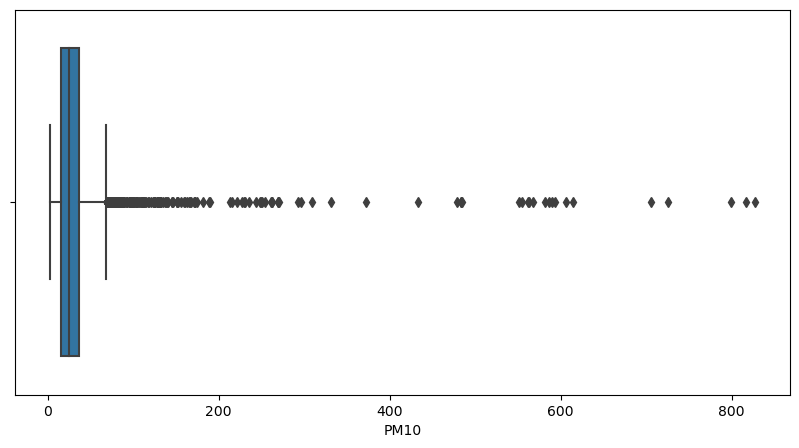

In [111]:
#변수의 분포를 확인해보세요.
plt.figure(figsize = (10, 5))
sns.boxplot(x = "PM10", data = bike)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

#위 정보로부터 파악하신 내용을 정리해보세요.
75%는 미세먼지 농도가 좋을 때 따릉이를 이용했다
오른쪽 펜스 값인 53이하일때 많이 이용???????

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

초미세먼지, 수치형, float

2. 변수가 수치형인지 범주형인지


In [112]:
#변수의 자료형을 확인해보세요.
bike["PM2.5"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
5732 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [113]:
bike["PM2.5"].value_counts()

5.0      265
7.0      262
11.0     259
12.0     256
13.0     255
        ... 
115.0      1
117.0      1
106.0      1
86.0       1
82.0       1
Name: PM2.5, Length: 110, dtype: int64

In [114]:
bike["PM2.5"].unique()

array([ 21.,  13.,  12.,  14.,  10.,   9.,   8.,  16.,  11.,   7.,  18.,
        19.,  24.,  22.,  20.,  17.,  15.,   4.,   6.,   5.,   1.,   2.,
         3.,  26.,  29.,  28.,  27.,  25.,  35.,  39.,  40.,  44.,  55.,
        60.,  62.,  58.,  56.,  54.,  32.,  23.,  31.,  33.,  nan,  30.,
        57.,  34.,  37.,  38.,  36.,  43.,  47.,  41.,  42.,  49.,  59.,
        52.,  50.,  78.,  88.,  89.,  93.,  94.,  87.,  86., 106., 117.,
       116., 115., 102.,  85.,  79.,  77.,  71.,  74.,  73.,  66.,  61.,
        53.,  45.,  65.,  67.,  63.,  51.,  46.,  48.,  91.,  99., 121.,
       125., 120., 123., 109., 110.,  83.,  90., 111., 107., 114., 101.,
       113.,  92.,  70.,  95., 104., 108., 122., 112.,  96.,  81.,  84.,
        82.])

In [115]:
#nan 값은 중위 값으로 채운다
bike["PM2.5"].fillna(bike["PM2.5"].mean(), inplace = True)

In [116]:
bike["PM2.5"].unique()

array([ 21.        ,  13.        ,  12.        ,  14.        ,
        10.        ,   9.        ,   8.        ,  16.        ,
        11.        ,   7.        ,  18.        ,  19.        ,
        24.        ,  22.        ,  20.        ,  17.        ,
        15.        ,   4.        ,   6.        ,   5.        ,
         1.        ,   2.        ,   3.        ,  26.        ,
        29.        ,  28.        ,  27.        ,  25.        ,
        35.        ,  39.        ,  40.        ,  44.        ,
        55.        ,  60.        ,  62.        ,  58.        ,
        56.        ,  54.        ,  32.        ,  23.        ,
        31.        ,  33.        ,  15.66660851,  30.        ,
        57.        ,  34.        ,  37.        ,  38.        ,
        36.        ,  43.        ,  47.        ,  41.        ,
        42.        ,  49.        ,  59.        ,  52.        ,
        50.        ,  78.        ,  88.        ,  89.        ,
        93.        ,  94.        ,  87.        ,  86.  

4. 변수의 기초 통계량 확인

In [118]:
#변수의 기초 통계량을 확인해보세요
bike["PM2.5"].describe()

count    5827.000000
mean       15.666609
std        13.737597
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

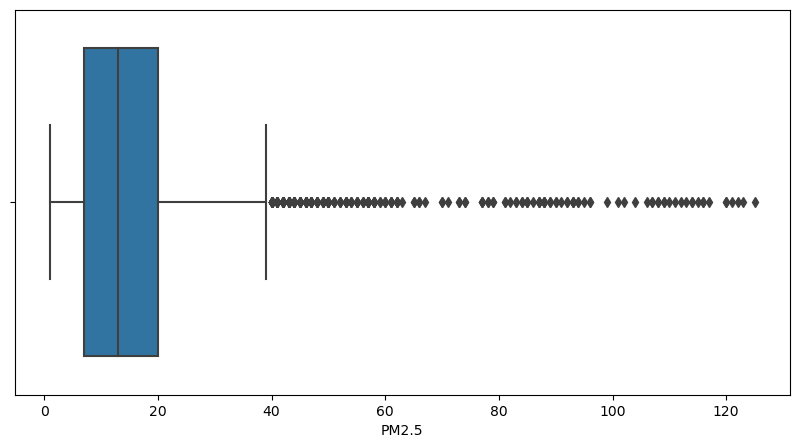

In [120]:
#변수의 분포를 확인해보세요.
plt.figure(figsize = (10, 5))
sns.boxplot(x = "PM2.5", data = bike)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

초미세먼지 농도가 33이하 일때 대부분 많이 이용했다. 수치가 높은건 주로 중국미세먼지 많이오는 봄이 아닐까 싶지만
이제는 사계절 미세먼지 테러라 모르겠다

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

따릉이 대여수, 수치형, int 자료형

2. 변수가 수치형인지 범주형인지


In [121]:
#변수의 자료형을 확인해보세요.
bike["count"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: count
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [122]:
bike["count"].value_counts()

20     45
16     45
24     44
21     44
25     44
       ..
553     1
789     1
803     1
794     1
519     1
Name: count, Length: 757, dtype: int64

In [123]:
bike["count"].unique()

array([  46,   40,   31,   12,   30,   77,  171,  330,  218,  175,  247,
        269,  289,  265,  342,  369,  564,  820,  526,  435,  396,  307,
        157,   85,   48,   17,   20,   24,   72,  169,  336,  207,  211,
        233,  286,  314,  360,  392,  507,  582,  411,  331,  366,  344,
        183,  126,   62,   58,   38,   18,   25,   43,   45,    5,    1,
          2,    3,    8,    6,   11,   15,   16,    7,   33,   67,   94,
        151,  210,  464,  601,  651,  613,  505,  427,  341,  252,  219,
        194,   78,   69,   35,    9,  188,  349,  187,  227,  280,  262,
        284,  390,  423,  552,  835,  479,  352,  258,  130,   80,   21,
         23,   29,  362,  230,  176,  249,  310,  268,  261,  329,  356,
        569,  856,  508,  413,  297,  112,   63,   36,   19,   28,   84,
        158,  216,  189,  282,  346,  274,  303,  324,  399,  574,  797,
        461,  293,  266,  103,   71,   42,  319,  140,  259,  492,  783,
        383,  276,  291,  108,   59,   60,   74,  1

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [124]:
bike["count"].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

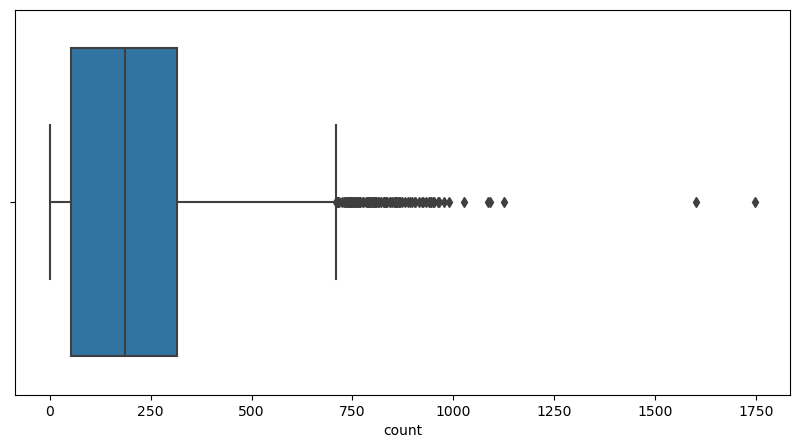

In [126]:
#변수의 분포를 확인해보세요.
plt.figure(figsize = (10, 5))
sns.boxplot(x = "count", data = bike)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

시간대 별로 53 ~ 315건 정도 빌렸다?

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

일자별로, 월별로 정리해서 하루 이용건 계산..

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [9]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [10]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

### 4월 시간대와 따릉이 대여량 

In [225]:
apr_hour = apr.groupby("hour", as_index = False)["count"].sum()

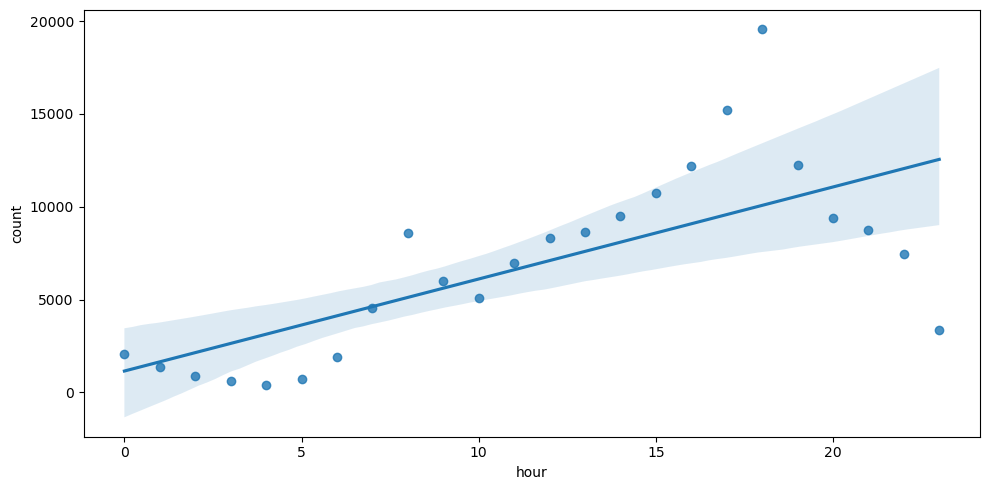

In [227]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "hour", y = "count", data = apr_hour)
plt.tight_layout()
plt.show()

In [230]:
import scipy.stats as spst
result1 = spst.pearsonr(apr_hour["hour"], apr_hour["count"])
print(f"hour : {result1}")

hour : PearsonRResult(statistic=0.6961229291095458, pvalue=0.00015820434787903168)


### 4월 시간대와 따릉이 대여수는 강한 상관관계가 있다

<hr>

### 5월 시간대와 따릉이 대여량 

In [231]:
may_hour = may.groupby("hour", as_index = False)["count"].sum()

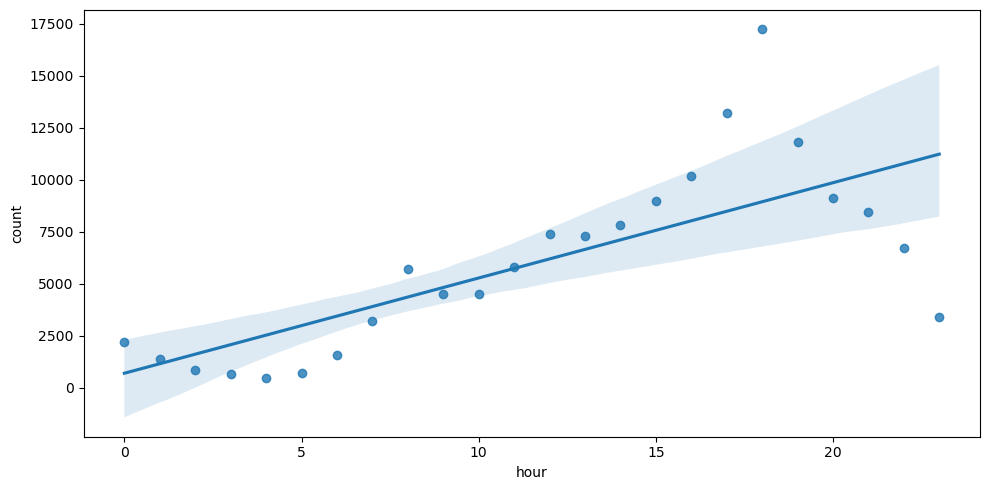

In [232]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "hour", y = "count", data = may_hour)
plt.tight_layout()
plt.show()

In [233]:
import scipy.stats as spst
result1 = spst.pearsonr(may_hour["hour"], may_hour["count"])
print(f"hour : {result1}")

hour : PearsonRResult(statistic=0.7324017812212332, pvalue=4.720361092796497e-05)


### 5월 시간대와 따릉이 대여수는 강한 상관관계가 있다

<hr>

### 6월 시간대와 따릉이 대여량 

In [238]:
jun_hour = jun.groupby("hour", as_index = False)["count"].sum()

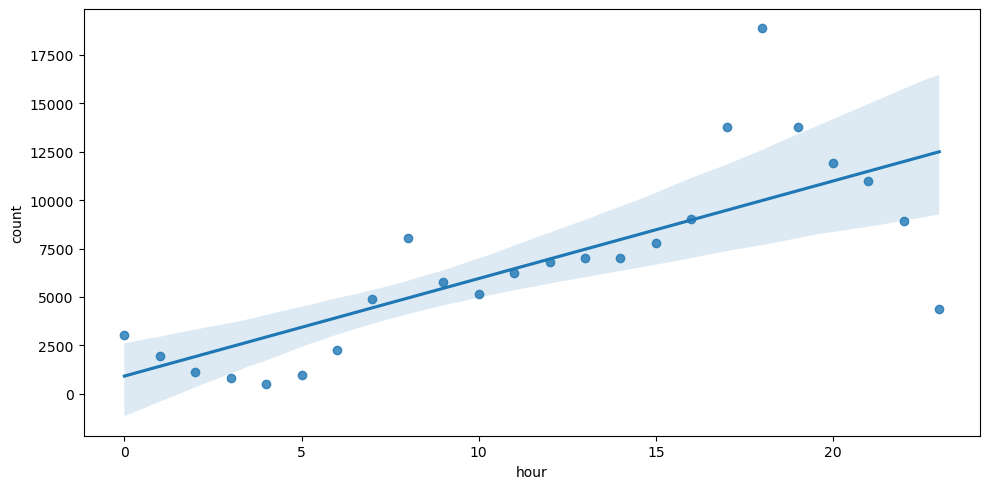

In [239]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "hour", y = "count", data = jun_hour)
plt.tight_layout()
plt.show()

In [240]:
import scipy.stats as spst
result1 = spst.pearsonr(jun_hour["hour"], jun_hour["count"])
print(f"hour : {result1}")

hour : PearsonRResult(statistic=0.7553432725363052, pvalue=1.9815407999948567e-05)


### 6월 시간대와 따릉이 대여수는 강한 상관관계가 있다

<hr>

### 7월 시간대와 따릉이 대여량 

In [242]:
jul_hour = jul.groupby("hour", as_index = False)["count"].sum()

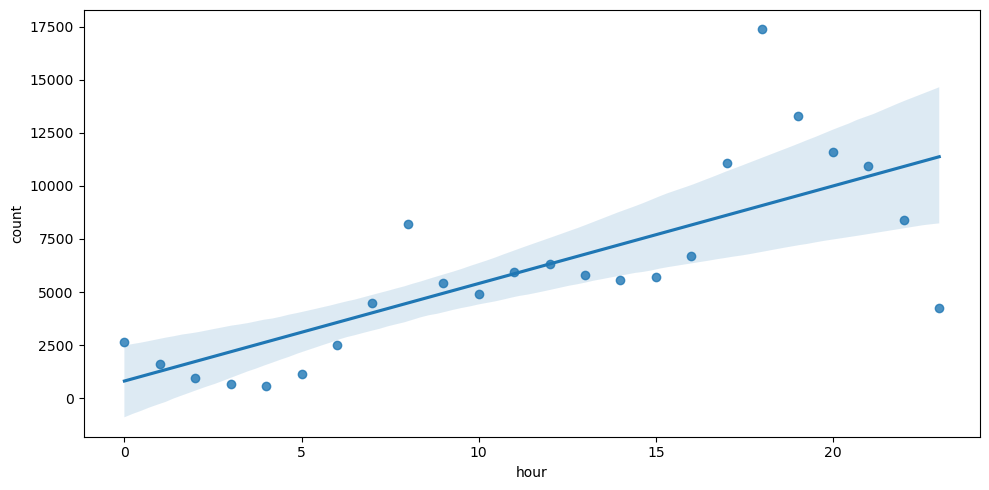

In [243]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "hour", y = "count", data = jul_hour)
plt.tight_layout()
plt.show()

In [244]:
import scipy.stats as spst
result1 = spst.pearsonr(jul_hour["hour"], jul_hour["count"])
print(f"hour : {result1}")

hour : PearsonRResult(statistic=0.7493707670252228, pvalue=2.505779372452892e-05)


### 7월 시간대와 따릉이 대여수는 강한 상관관계가 있다

<hr>

### 8월 시간대와 따릉이 대여량 

In [245]:
aug_hour = aug.groupby("hour", as_index = False)["count"].sum()

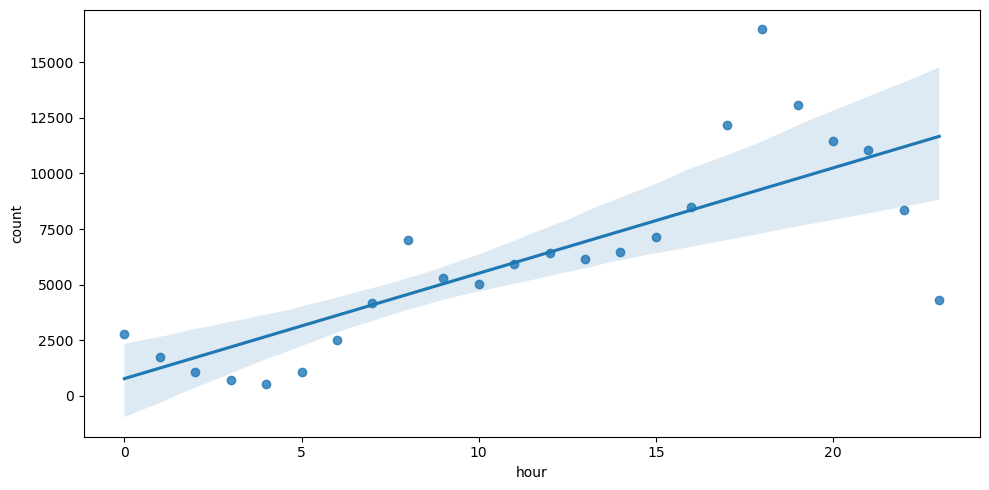

In [246]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "hour", y = "count", data = aug_hour)
plt.tight_layout()
plt.show()

In [247]:
import scipy.stats as spst
result1 = spst.pearsonr(aug_hour["hour"], aug_hour["count"])
print(f"hour : {result1}")

hour : PearsonRResult(statistic=0.7829636307322976, pvalue=6.1048175961234545e-06)


### 8월 시간대와 따릉이 대여수는 강한 상관관계가 있다

<hr>

### 9월 시간대와 따릉이 대여량 

In [248]:
sep_hour = sep.groupby("hour", as_index = False)["count"].sum()

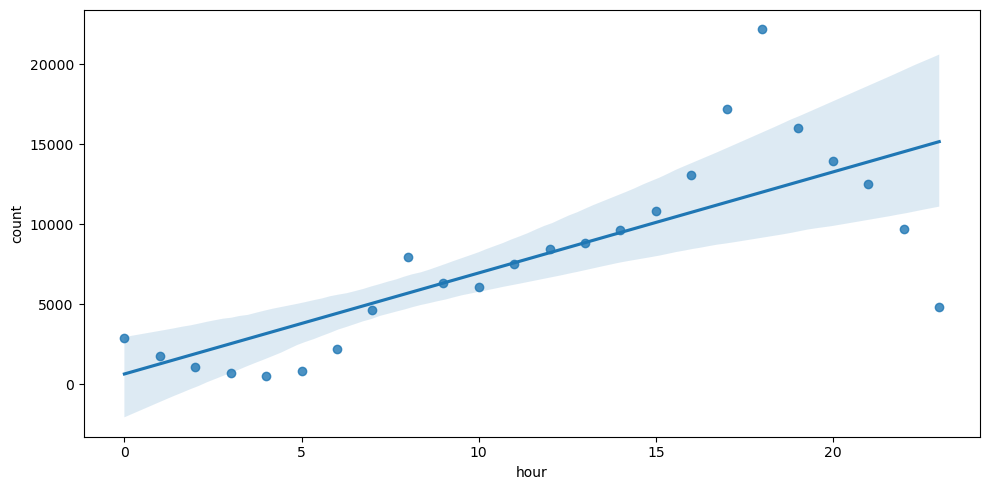

In [249]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "hour", y = "count", data = sep_hour)
plt.tight_layout()
plt.show()

In [250]:
import scipy.stats as spst
result1 = spst.pearsonr(sep_hour["hour"], sep_hour["count"])
print(f"hour : {result1}")

hour : PearsonRResult(statistic=0.7656455939215785, pvalue=1.3010691849513001e-05)


### 9월 시간대와 따릉이 대여수는 강한 상관관계가 있다

<hr>

### 10월 시간대와 따릉이 대여량 

In [251]:
oct_hour = oct.groupby("hour", as_index = False)["count"].sum()

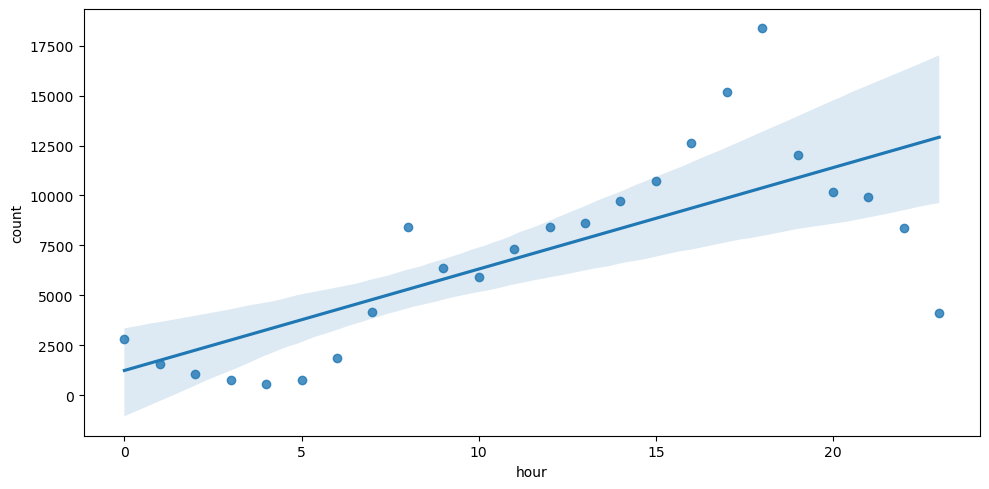

In [252]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "hour", y = "count", data = oct_hour)
plt.tight_layout()
plt.show()

In [253]:
import scipy.stats as spst
result1 = spst.pearsonr(oct_hour["hour"], oct_hour["count"])
print(f"hour : {result1}")

hour : PearsonRResult(statistic=0.7360678551566098, pvalue=4.133290132169793e-05)


### 10월 시간대와 따릉이 대여수는 강한 상관관계가 있다

<hr>

### 11월 시간대와 따릉이 대여량 

In [255]:
nov_hour = nov.groupby("hour", as_index = False)["count"].sum()

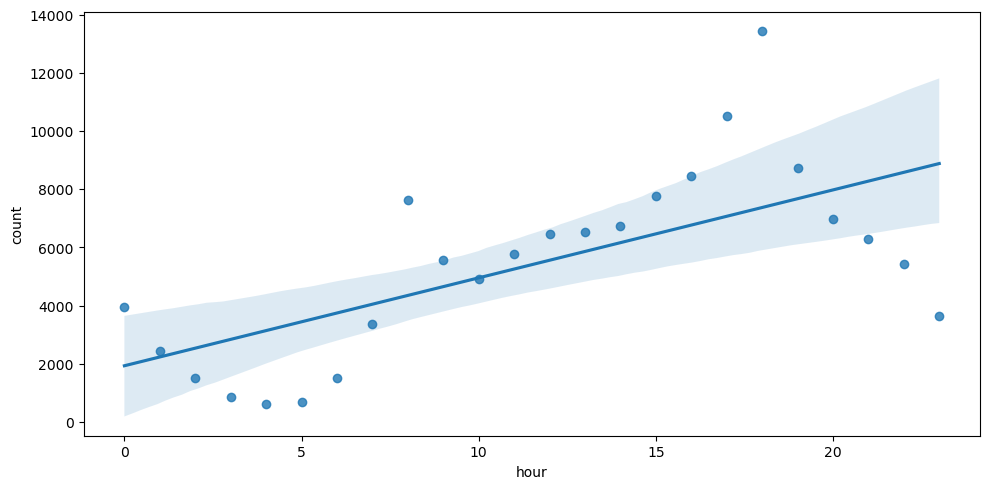

In [256]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "hour", y = "count", data = nov_hour)
plt.tight_layout()
plt.show()

In [257]:
import scipy.stats as spst
result1 = spst.pearsonr(nov_hour["hour"], nov_hour["count"])
print(f"hour : {result1}")

hour : PearsonRResult(statistic=0.6568464041026525, pvalue=0.0004891157970525942)


### 11월 시간대와 따릉이 대여수는 강한 상관관계가 있다

## 결론 : 월 별로 모두 시간대와 따릉이 대여수는 강한 상관관계를 가지고 있다..?

<hr>

<hr>

In [155]:
apr = bike.loc[bike["month"] == 4]
may = bike.loc[bike["month"] == 5]
jun = bike.loc[bike["month"] == 6]
jul = bike.loc[bike["month"] == 7]
aug = bike.loc[bike["month"] == 8]
sep = bike.loc[bike["month"] == 9]
oct = bike.loc[bike["month"] == 10]
nov = bike.loc[bike["month"] == 11]

3. 온도 데이터와 따릉이 대여량간 분석

In [11]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

### 4월 온도와 따릉이 대여량 

In [259]:
apr_tmp = apr.groupby("temperature", as_index = False)["count"].sum()

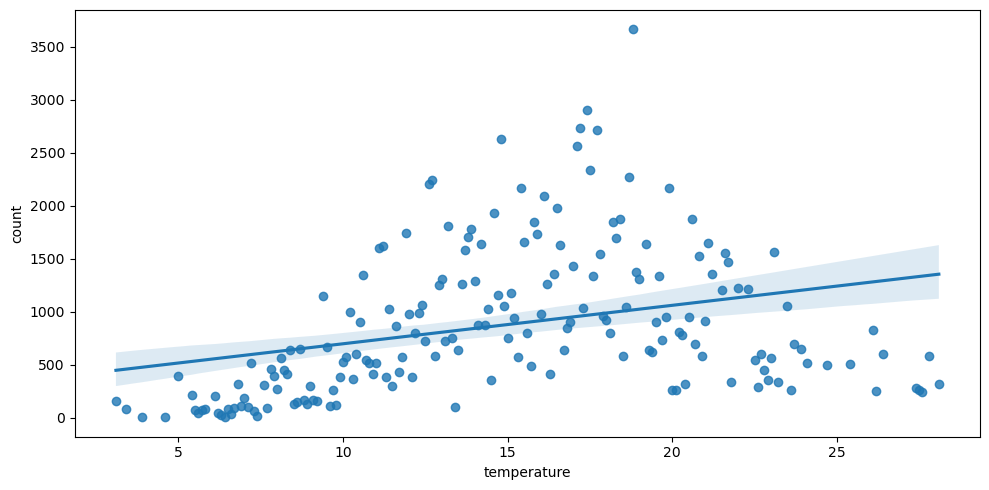

In [260]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "temperature", y = "count", data = apr_tmp)
plt.tight_layout()
plt.show()

In [298]:
import scipy.stats as spst
result1 = spst.pearsonr(apr_tmp["temperature"], apr_tmp["count"])
print(f"temperature : {result1}")

temperature : PearsonRResult(statistic=0.3132922675350941, pvalue=1.1992954861271647e-05)


### 4월 온도와 따릉이 대여수는 약한 상관관계가 있다? 정규분포 그래프?

<hr>

### 5월 온도와 따릉이 대여량 

In [263]:
may_tmp = may.groupby("temperature", as_index = False)["count"].sum()

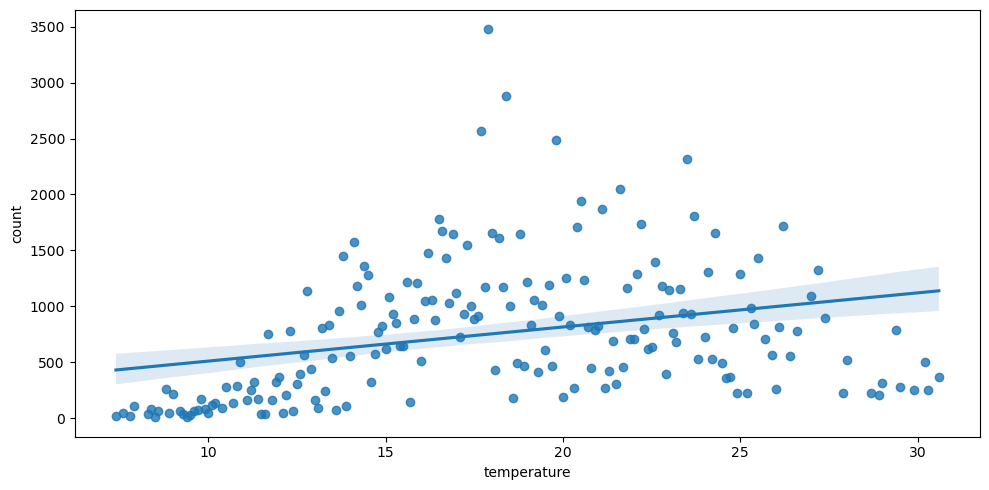

In [264]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "temperature", y = "count", data = may_tmp)
plt.tight_layout()
plt.show()

In [297]:
import scipy.stats as spst
result1 = spst.pearsonr(may_tmp["temperature"], may_tmp["count"])
print(f"temperature : {result1}")

temperature : PearsonRResult(statistic=0.29965211986793405, pvalue=2.6681583615603423e-05)


### 5월 온도와 따릉이 대여수는 약한 상관관계가 있다? 정규분포 그래프?

<hr>

### 6월 온도와 따릉이 대여량 

In [266]:
jun_tmp = jun.groupby("temperature", as_index = False)["count"].sum()

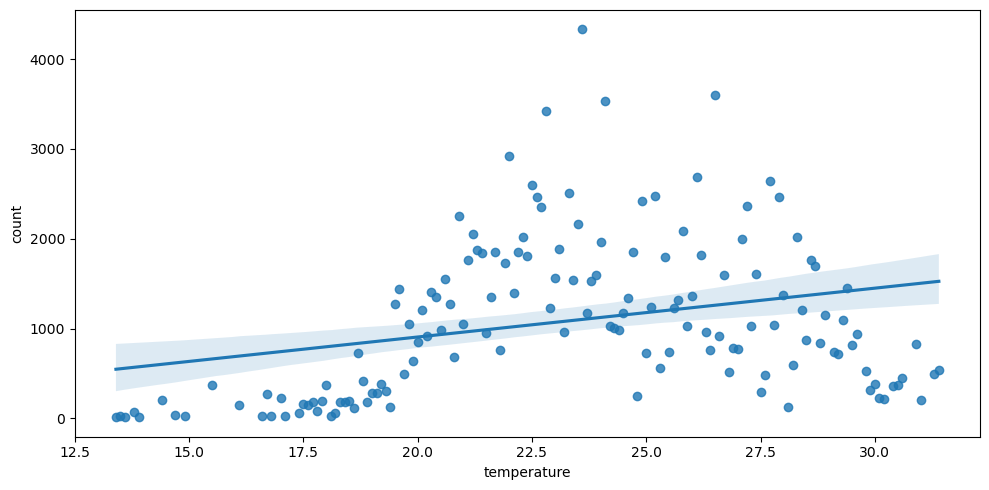

In [267]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "temperature", y = "count", data = jun_tmp)
plt.tight_layout()
plt.show()

In [296]:
import scipy.stats as spst
result1 = spst.pearsonr(jun_tmp["temperature"], jun_tmp["count"])
print(f"temperature : {result1}")

temperature : PearsonRResult(statistic=0.2897679499818439, pvalue=0.0003377276860515623)


### 6월 온도와 따릉이 대여수는 약한 상관관계가 있다? 정규분포 그래프?

<hr>

### 7월 온도와 따릉이 대여량 

In [269]:
jul_tmp = jul.groupby("temperature", as_index = False)["count"].sum()

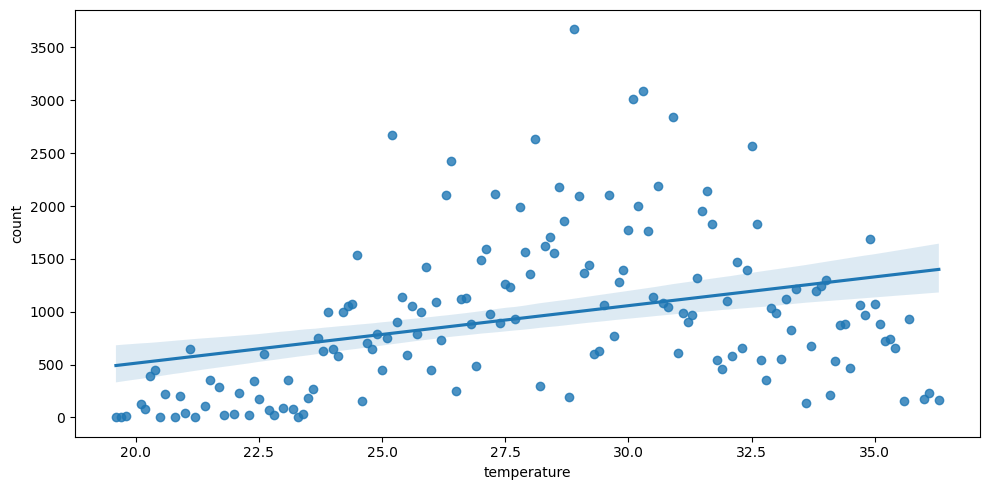

In [270]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "temperature", y = "count", data = jul_tmp)
plt.tight_layout()
plt.show()

In [295]:
import scipy.stats as spst
result1 = spst.pearsonr(jul_tmp["temperature"], jul_tmp["count"])
print(f"temperature : {result1}")

temperature : PearsonRResult(statistic=0.3395665822996865, pvalue=1.6451636203779446e-05)


### 7월 온도와 따릉이 대여수는 약한 상관관계가 있다? 정규분포 그래프?

<hr>

### 8월 온도와 따릉이 대여량 

In [272]:
aug_tmp = aug.groupby("temperature", as_index = False)["count"].sum()

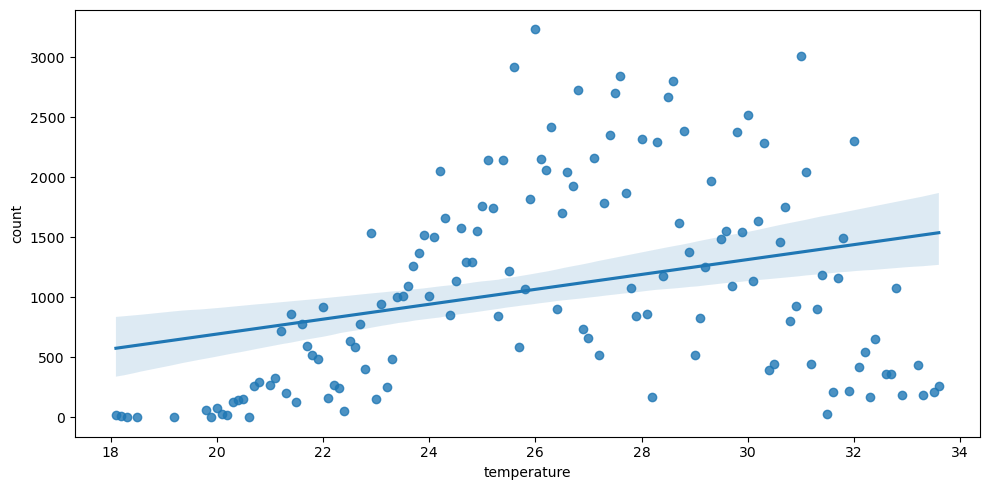

In [273]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "temperature", y = "count", data = aug_tmp)
plt.tight_layout()
plt.show()

In [294]:
import scipy.stats as spst
result1 = spst.pearsonr(aug_tmp["temperature"], aug_tmp["count"])
print(f"temperature : {result1}")

temperature : PearsonRResult(statistic=0.30712979542102403, pvalue=0.00024820234615564727)


### 8월 온도와 따릉이 대여수는 약한 상관관계가 있다? 정규분포 그래프?

<hr>

### 9월 온도와 따릉이 대여량 

In [275]:
sep_tmp = apr.groupby("temperature", as_index = False)["count"].sum()

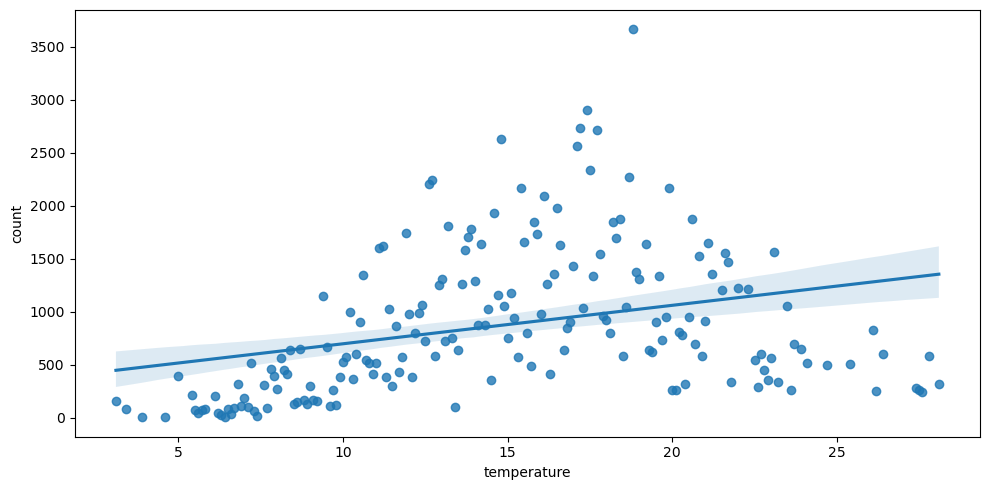

In [277]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "temperature", y = "count", data = sep_tmp)
plt.tight_layout()
plt.show()

In [293]:
import scipy.stats as spst
result1 = spst.pearsonr(sep_tmp["temperature"], sep_tmp["count"])
print(f"temperature : {result1}")

temperature : PearsonRResult(statistic=0.3132922675350941, pvalue=1.1992954861271647e-05)


### 9월 온도와 따릉이 대여수는 약한 상관관계가 있다? 정규분포 그래프?

<hr>

### 10월 온도와 따릉이 대여량 

In [280]:
oct_tmp = oct.groupby("temperature", as_index = False)["count"].sum()

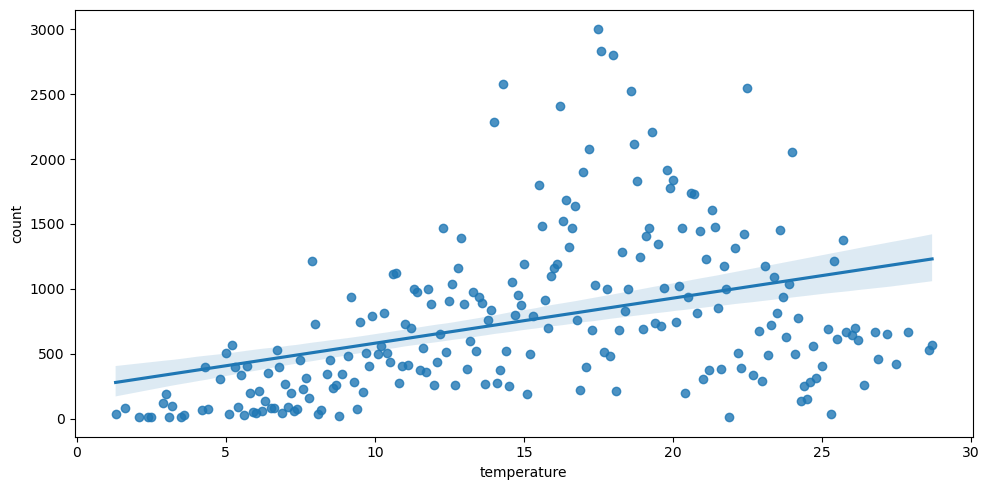

In [281]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "temperature", y = "count", data = oct_tmp)
plt.tight_layout()
plt.show()

In [292]:
import scipy.stats as spst
result1 = spst.pearsonr(oct_tmp["temperature"], oct_tmp["count"])
print(f"temperature : {result1}")

temperature : PearsonRResult(statistic=0.38751351545097223, pvalue=1.7758665451229428e-09)


### 10월 온도와 따릉이 대여수는 약한 상관관계가 있다? 정규분포 그래프?

<hr>

### 11월 온도와 따릉이 대여량 

In [283]:
nov_tmp = nov.groupby("temperature", as_index = False)["count"].sum()

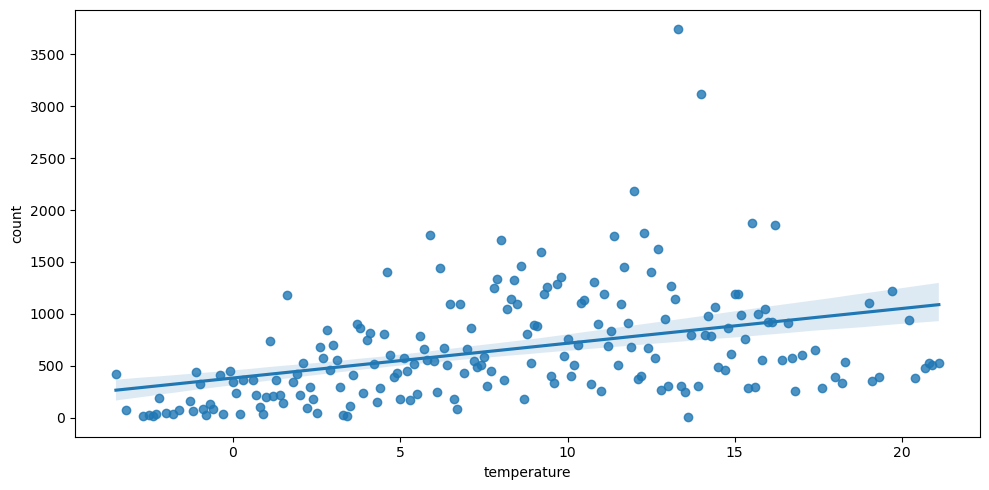

In [284]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "temperature", y = "count", data = nov_tmp)
plt.tight_layout()
plt.show()

In [291]:
import scipy.stats as spst
result1 = spst.pearsonr(nov_tmp["temperature"], nov_tmp["count"])
print(f"temperature : {result1}")

temperature : PearsonRResult(statistic=0.3901384920152908, pvalue=1.333289683473138e-08)


### 11월 온도와 따릉이 대여수는 약한 상관관계가 있다? 정규분포 그래프?

## 결론 : 온도와 따릉이 대여수는 전체적으로 약한 상관관계가 있다?

<hr>

<hr>

4. 풍속 데이터와 따릉이 대여량간 분석

In [12]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

### 4월 풍속과 따릉이 대여량 

In [286]:
apr_win = apr.groupby("windspeed", as_index = False)["count"].sum()

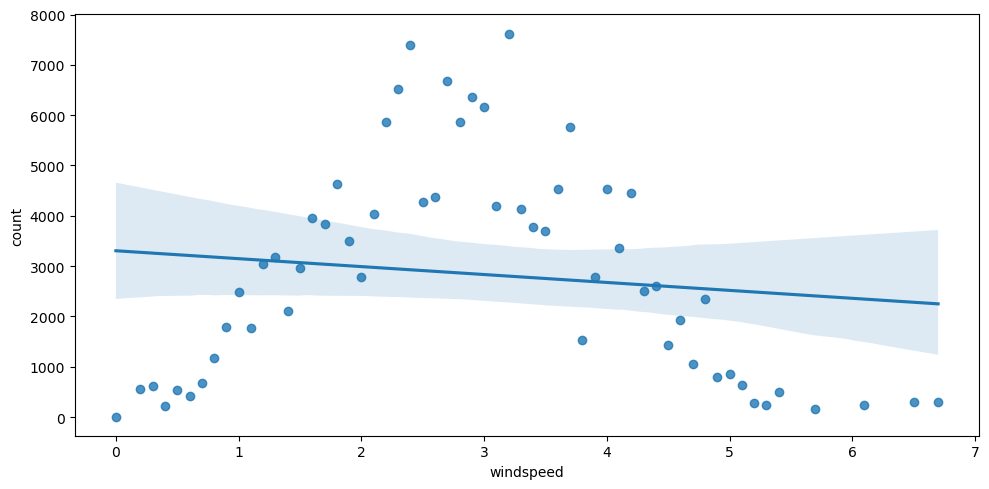

In [288]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "windspeed", y = "count", data = apr_win)
plt.tight_layout()
plt.show()

In [290]:
import scipy.stats as spst
result1 = spst.pearsonr(apr_win["windspeed"], apr_win["count"])
print(f"windspeed : {result1}")

windspeed : PearsonRResult(statistic=-0.1300387558003733, pvalue=0.3305899313876855)


### 4월 풍속과 따릉이 대여수는 상관관계가 없다? 정규분포 그래프?

<hr>

### 5월 풍속과 따릉이 대여량 

In [299]:
may_win = may.groupby("windspeed", as_index = False)["count"].sum()

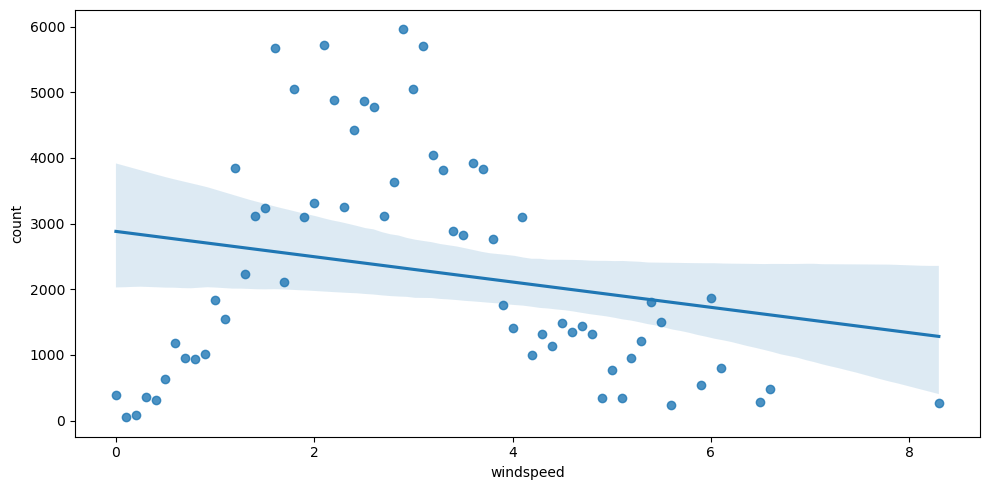

In [300]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "windspeed", y = "count", data = may_win)
plt.tight_layout()
plt.show()

In [301]:
import scipy.stats as spst
result1 = spst.pearsonr(may_win["windspeed"], may_win["count"])
print(f"windspeed : {result1}")

windspeed : PearsonRResult(statistic=-0.21854711756603562, pvalue=0.0852877319812664)


### 5월 풍속과 따릉이 대여수는 상관관계가 없다? 정규분포 그래프?

<hr>

### 6월 풍속과 따릉이 대여량 

In [302]:
jun_win = apr.groupby("windspeed", as_index = False)["count"].sum()

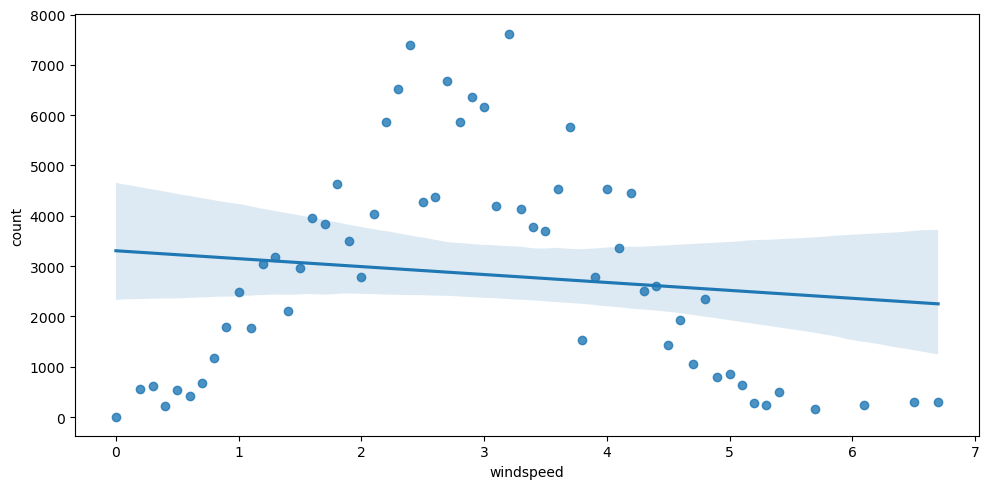

In [303]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "windspeed", y = "count", data = jun_win)
plt.tight_layout()
plt.show()

In [304]:
import scipy.stats as spst
result1 = spst.pearsonr(jun_win["windspeed"], jun_win["count"])
print(f"windspeed : {result1}")

windspeed : PearsonRResult(statistic=-0.1300387558003733, pvalue=0.3305899313876855)


### 6월 풍속과 따릉이 대여수는 상관관계가 없다? 정규분포 그래프?

<hr>

### 7월 풍속과 따릉이 대여량 

In [305]:
jul_win = apr.groupby("windspeed", as_index = False)["count"].sum()

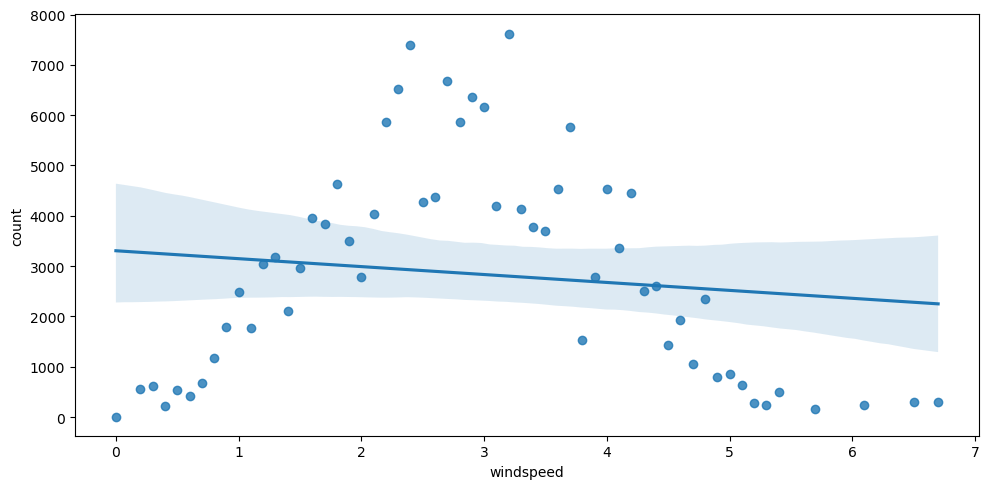

In [306]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "windspeed", y = "count", data = jul_win)
plt.tight_layout()
plt.show()

In [307]:
import scipy.stats as spst
result1 = spst.pearsonr(jul_win["windspeed"], jul_win["count"])
print(f"windspeed : {result1}")

windspeed : PearsonRResult(statistic=-0.1300387558003733, pvalue=0.3305899313876855)


### 7월 풍속과 따릉이 대여수는 상관관계가 없다? 정규분포 그래프?

<hr>

### 8월 풍속과 따릉이 대여량 

In [308]:
aug_win = aug.groupby("windspeed", as_index = False)["count"].sum()

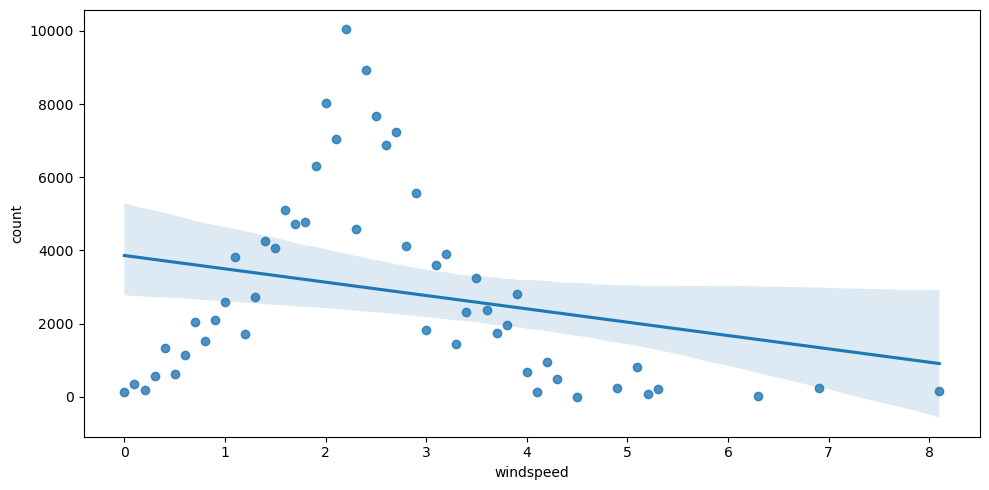

In [309]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "windspeed", y = "count", data = aug_win)
plt.tight_layout()
plt.show()

In [310]:
import scipy.stats as spst
result1 = spst.pearsonr(aug_win["windspeed"], aug_win["count"])
print(f"windspeed : {result1}")

windspeed : PearsonRResult(statistic=-0.2519406595338729, pvalue=0.07157787103829412)


### 8월 풍속과 따릉이 대여수는 상관관계가 없다? 정규분포 그래프?

<hr>

### 9월 풍속과 따릉이 대여량 

In [311]:
sep_win = sep.groupby("windspeed", as_index = False)["count"].sum()

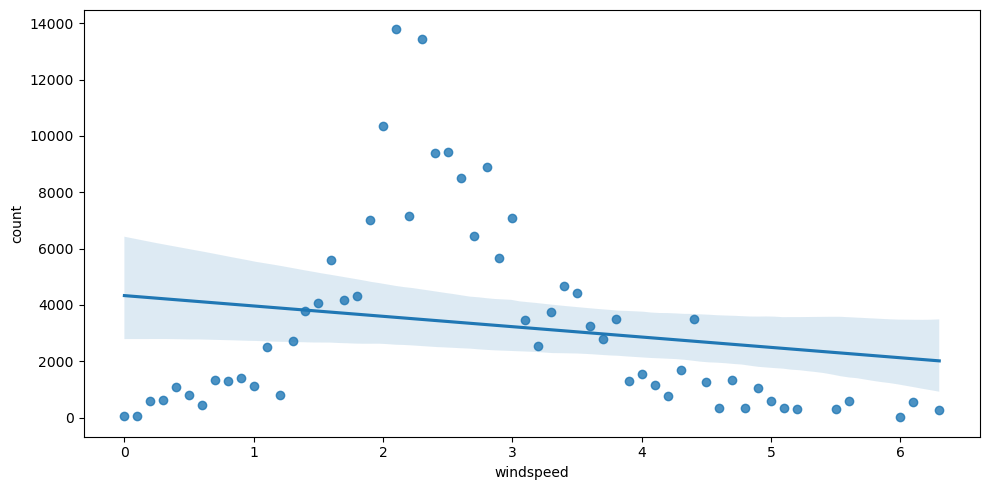

In [312]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "windspeed", y = "count", data = sep_win)
plt.tight_layout()
plt.show()

In [313]:
import scipy.stats as spst
result1 = spst.pearsonr(sep_win["windspeed"], sep_win["count"])
print(f"windspeed : {result1}")

windspeed : PearsonRResult(statistic=-0.18831034828756993, pvalue=0.15688973633987982)


### 9월 풍속과 따릉이 대여수는 상관관계가 없다? 정규분포 그래프?

<hr>

### 10월 풍속과 따릉이 대여량 

In [314]:
oct_win = apr.groupby("windspeed", as_index = False)["count"].sum()

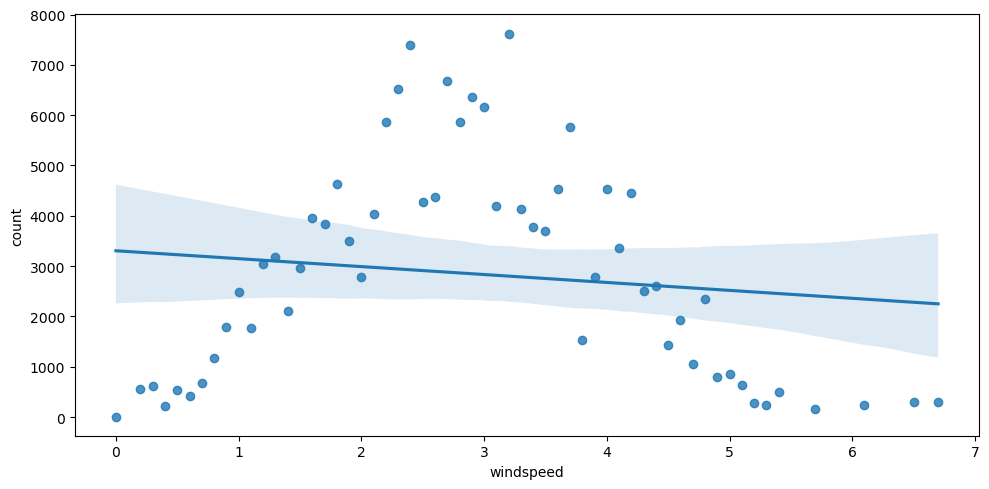

In [315]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "windspeed", y = "count", data = oct_win)
plt.tight_layout()
plt.show()

In [316]:
import scipy.stats as spst
result1 = spst.pearsonr(oct_win["windspeed"], oct_win["count"])
print(f"windspeed : {result1}")

windspeed : PearsonRResult(statistic=-0.1300387558003733, pvalue=0.3305899313876855)


### 10월 풍속과 따릉이 대여수는 상관관계가 없다? 정규분포 그래프?

<hr>

### 11월 풍속과 따릉이 대여량 

In [318]:
nov_win = nov.groupby("windspeed", as_index = False)["count"].sum()

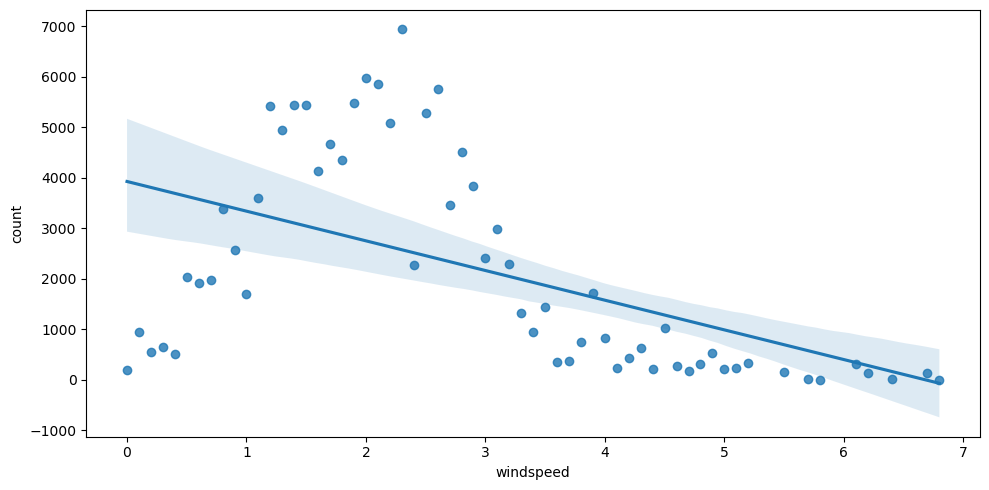

In [319]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "windspeed", y = "count", data = nov_win)
plt.tight_layout()
plt.show()

In [320]:
import scipy.stats as spst
result1 = spst.pearsonr(nov_win["windspeed"], nov_win["count"])
print(f"windspeed : {result1}")

windspeed : PearsonRResult(statistic=-0.5303865903197431, pvalue=1.100074345636501e-05)


### 11월 풍속과 따릉이 대여수는 음의 상관관계를 가진다 정규분포 그래프?

## 결론 : 풍속과 따릉이 대여수는 11월만 음의 상관관계가 있고 나머지는 상관관계가 없다?

<hr>

<hr>

5. 습도 데이터와 따릉이 대여량간 분석

In [13]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

### 4월 풍속과 따릉이 대여량 

In [286]:
apr_win = apr.groupby("windspeed", as_index = False)["count"].sum()

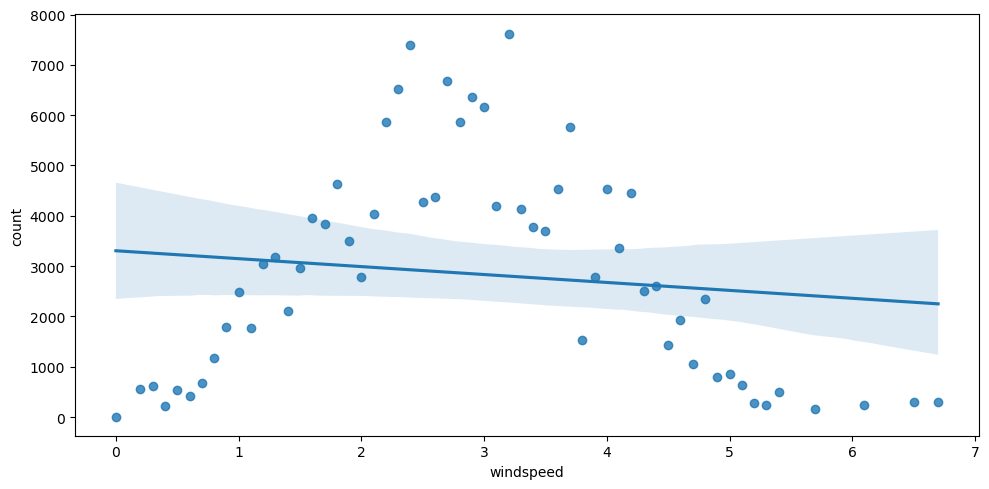

In [288]:
plt.figure(figsize = (10, 5))
sns.regplot(x = "windspeed", y = "count", data = apr_win)
plt.tight_layout()
plt.show()

In [290]:
import scipy.stats as spst
result1 = spst.pearsonr(apr_win["windspeed"], apr_win["count"])
print(f"windspeed : {result1}")

windspeed : PearsonRResult(statistic=-0.1300387558003733, pvalue=0.3305899313876855)


### 4월 풍속과 따릉이 대여수는 상관관계가 없다? 정규분포 그래프?

<hr>

6. 시정 데이터와 따릉이 대여량간 분석

In [14]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

7. 오존 데이터와 따릉이 대여량간 분석

In [15]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

<hr>

### 4월 미세먼지, 초미세먼지 

In [168]:
apr_pm10 = apr.groupby("day", as_index = False)[["PM10", "count"]].sum()
apr_pm25 = apr.groupby("day", as_index = False)[["PM2.5", "count"]].sum()

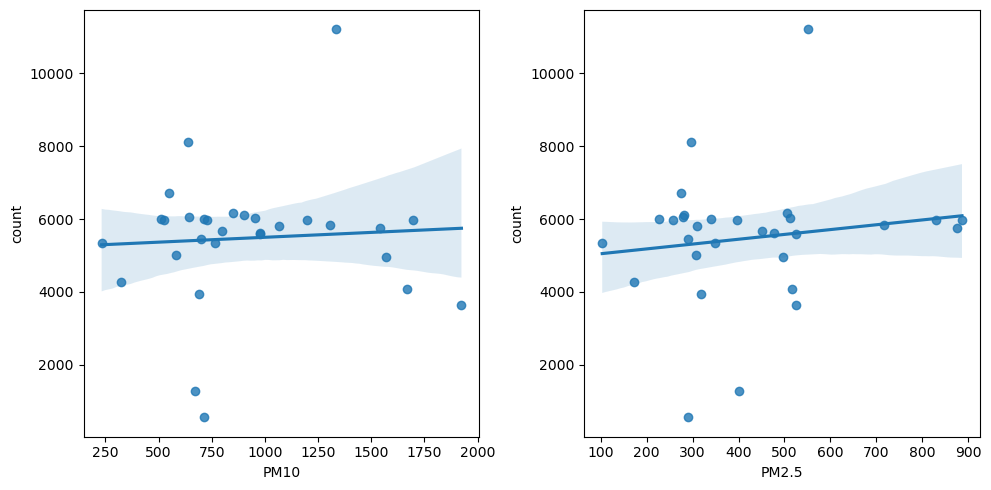

In [179]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.regplot(x = "PM10", y = "count", data = apr_pm10)
plt.subplot(1, 2, 2)
sns.regplot(x = "PM2.5", y = "count", data = apr_pm25)
plt.tight_layout()
plt.show()

In [183]:
import scipy.stats as spst
result1 = spst.pearsonr(apr_pm10["PM10"], apr_pm10["count"])
result2 = spst.pearsonr(apr_pm25["PM2.5"], apr_pm25["count"])
print(f"PM10 : {result1}")
print(f"PM25 : {result2}")

PM10 : PearsonRResult(statistic=0.06278157703571217, pvalue=0.7417153125618844)
PM25 : PearsonRResult(statistic=0.14417273827870608, pvalue=0.4471967905174106)


#### 4월 미세먼지, 초미세먼지 수치와 따릉이 대여수의 상관관계는 없다

<hr>

### 5월 미세먼지, 초미세먼지 

In [187]:
may_pm10 = may.groupby("day", as_index = False)[["PM10", "count"]].sum()
may_pm25 = may.groupby("day", as_index = False)[["PM2.5", "count"]].sum()

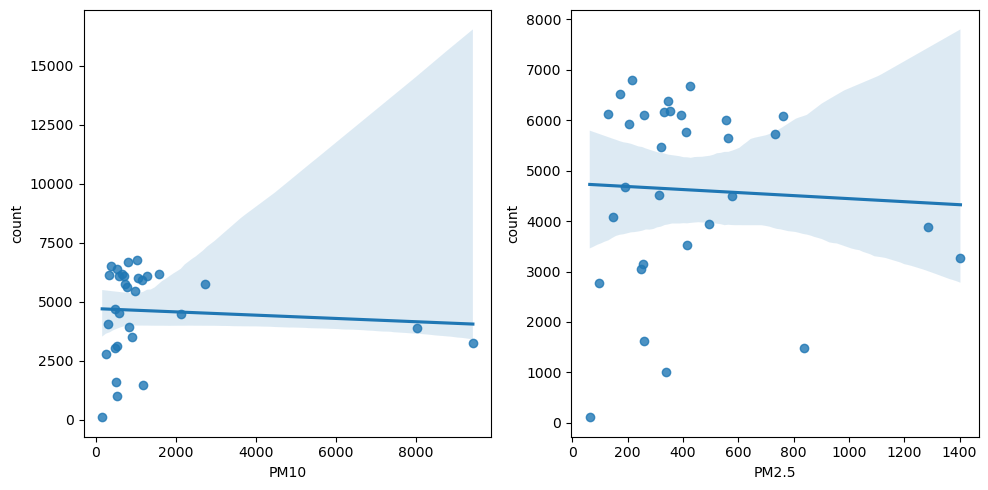

In [188]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.regplot(x = "PM10", y = "count", data = may_pm10)
plt.subplot(1, 2, 2)
sns.regplot(x = "PM2.5", y = "count", data = may_pm25)
plt.tight_layout()
plt.show()

In [190]:
import scipy.stats as spst
result1 = spst.pearsonr(may_pm10["PM10"], may_pm10["count"])
result2 = spst.pearsonr(may_pm25["PM2.5"], may_pm25["count"])
print(f"PM10 : {result1}")
print(f"PM25 : {result2}")

PM10 : PearsonRResult(statistic=-0.0773181567373562, pvalue=0.6793000259919412)
PM25 : PearsonRResult(statistic=-0.05088143359711014, pvalue=0.7857527413911071)


#### 5월 미세먼지, 초미세먼지 수치와 따릉이 대여수의 상관관계는 없다

<hr>

### 6월 미세먼지, 초미세먼지 

In [191]:
jun_pm10 = jun.groupby("day", as_index = False)[["PM10", "count"]].sum()
jun_pm25 = jun.groupby("day", as_index = False)[["PM2.5", "count"]].sum()

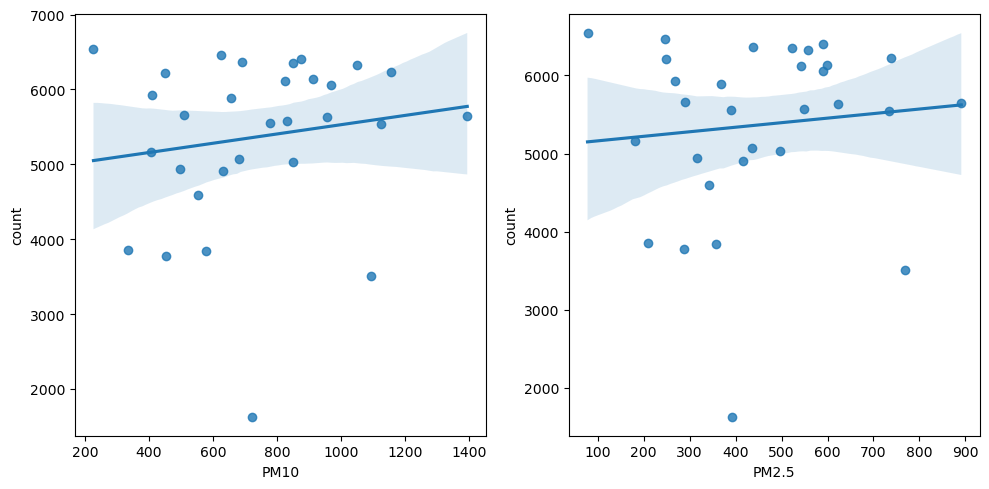

In [192]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.regplot(x = "PM10", y = "count", data = jun_pm10)
plt.subplot(1, 2, 2)
sns.regplot(x = "PM2.5", y = "count", data = jun_pm25)
plt.tight_layout()
plt.show()

In [193]:
import scipy.stats as spst
result1 = spst.pearsonr(jun_pm10["PM10"], jun_pm10["count"])
result2 = spst.pearsonr(jun_pm25["PM2.5"], jun_pm25["count"])
print(f"PM10 : {result1}")
print(f"PM25 : {result2}")

PM10 : PearsonRResult(statistic=0.15173182028013726, pvalue=0.42347544041833796)
PM25 : PearsonRResult(statistic=0.10005616279383574, pvalue=0.5988418085768229)


#### 6월 미세먼지, 초미세먼지 수치와 따릉이 대여수의 상관관계는 없다

<hr>

### 7월 미세먼지, 초미세먼지 

In [221]:
jul_pm10 = jul.groupby("day", as_index = False)[["PM10", "count"]].sum()
jul_pm25 = jul.groupby("day", as_index = False)[["PM2.5", "count"]].sum()

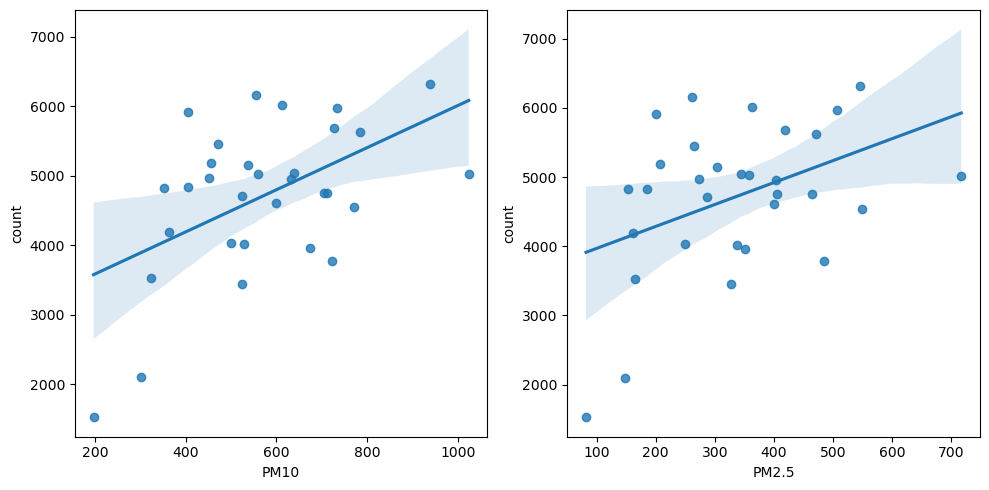

In [222]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.regplot(x = "PM10", y = "count", data = jul_pm10)
plt.subplot(1, 2, 2)
sns.regplot(x = "PM2.5", y = "count", data = jul_pm25)
plt.tight_layout()
plt.show()

In [223]:
import scipy.stats as spst
result1 = spst.pearsonr(jul_pm10["PM10"], jul_pm10["count"])
result2 = spst.pearsonr(jul_pm25["PM2.5"], jul_pm25["count"])
print(f"PM10 : {result1}")
print(f"PM25 : {result2}")

PM10 : PearsonRResult(statistic=0.5178086417119939, pvalue=0.002849211011300381)
PM25 : PearsonRResult(statistic=0.41978364303542304, pvalue=0.018723789011627117)


### <u> p-value값이 둘다 0.05보다 작아서 7월 미세먼지, 초미세먼지 수치와 따릉이 대여수의 상관관계가 있다.</u> 근데 왜 양의 상관계수....?

<hr>

### 8월 미세먼지, 초미세먼지 

In [218]:
aug_pm10 = aug.groupby("day", as_index = False)[["PM10", "count"]].sum()
aug_pm25 = aug.groupby("day", as_index = False)[["PM2.5", "count"]].sum()

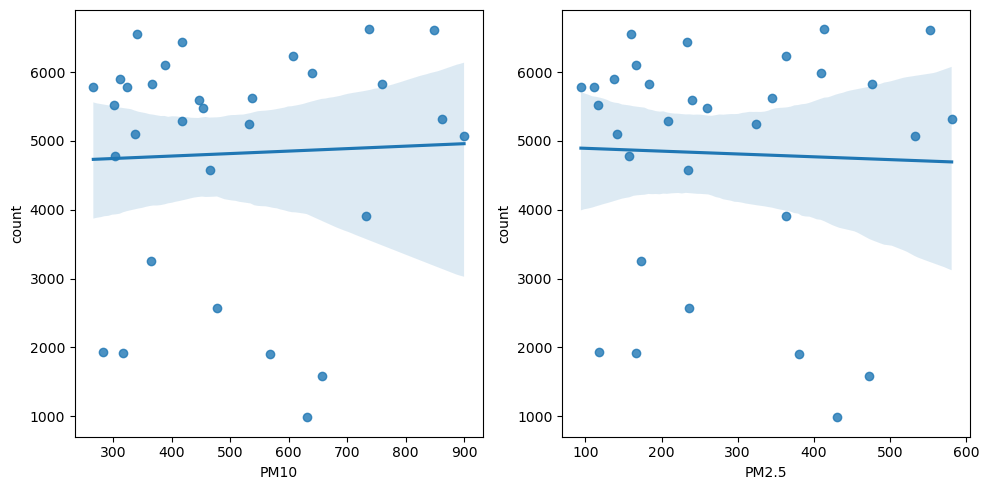

In [219]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.regplot(x = "PM10", y = "count", data = aug_pm10)
plt.subplot(1, 2, 2)
sns.regplot(x = "PM2.5", y = "count", data = aug_pm25)
plt.tight_layout()
plt.show()

In [220]:
import scipy.stats as spst
result1 = spst.pearsonr(aug_pm10["PM10"], aug_pm10["count"])
result2 = spst.pearsonr(aug_pm25["PM2.5"], aug_pm25["count"])
print(f"PM10 : {result1}")
print(f"PM25 : {result2}")

PM10 : PearsonRResult(statistic=0.04058675660811891, pvalue=0.8283796221650558)
PM25 : PearsonRResult(statistic=-0.03580874102763919, pvalue=0.8483355514306742)


#### 8월 미세먼지, 초미세먼지 수치와 따릉이 대여수의 상관관계는 없다

<hr>

### 9월 미세먼지, 초미세먼지 

In [215]:
sep_pm10 = sep.groupby("day", as_index = False)[["PM10", "count"]].sum()
sep_pm25 = sep.groupby("day", as_index = False)[["PM2.5", "count"]].sum()

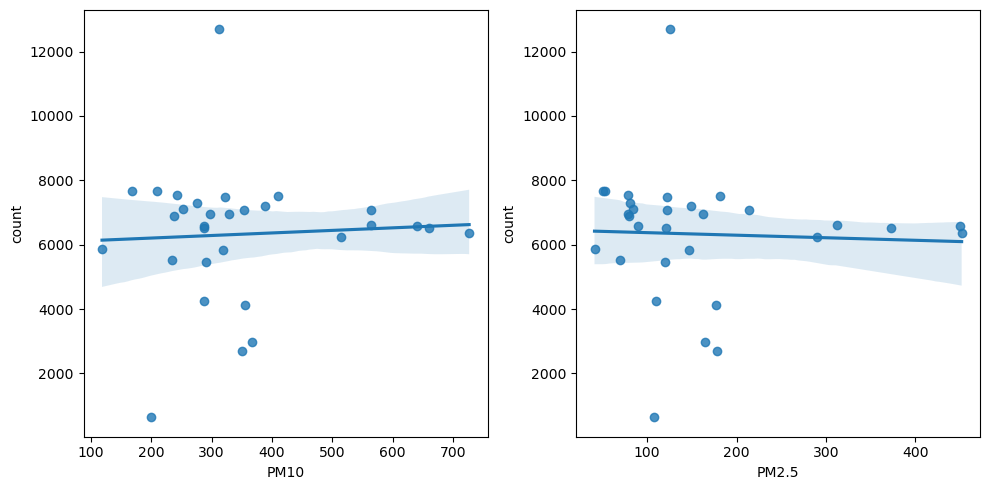

In [216]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.regplot(x = "PM10", y = "count", data = sep_pm10)
plt.subplot(1, 2, 2)
sns.regplot(x = "PM2.5", y = "count", data = sep_pm25)
plt.tight_layout()
plt.show()

In [217]:
import scipy.stats as spst
result1 = spst.pearsonr(sep_pm10["PM10"], sep_pm10["count"])
result2 = spst.pearsonr(sep_pm25["PM2.5"], sep_pm25["count"])
print(f"PM10 : {result1}")
print(f"PM25 : {result2}")

PM10 : PearsonRResult(statistic=0.05821488060905734, pvalue=0.7599346925254525)
PM25 : PearsonRResult(statistic=-0.04273358258518524, pvalue=0.8225876526143961)


#### 9월 미세먼지, 초미세먼지 수치와 따릉이 대여수의 상관관계는 없다

<hr>

### 10월 미세먼지, 초미세먼지 

In [212]:
oct_pm10 = oct.groupby("day", as_index = False)[["PM10", "count"]].sum()
oct_pm25 = oct.groupby("day", as_index = False)[["PM2.5", "count"]].sum()

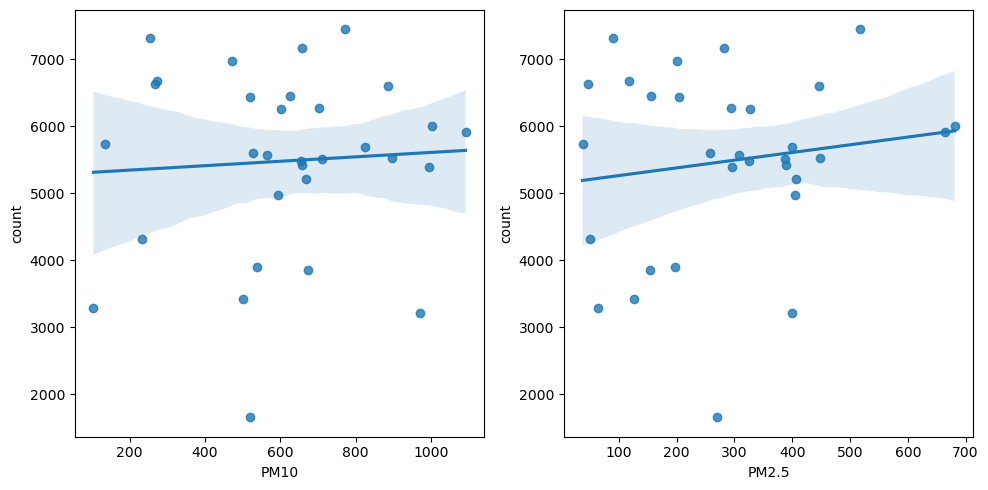

In [213]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.regplot(x = "PM10", y = "count", data = oct_pm10)
plt.subplot(1, 2, 2)
sns.regplot(x = "PM2.5", y = "count", data = oct_pm25)
plt.tight_layout()
plt.show()

In [214]:
import scipy.stats as spst
result1 = spst.pearsonr(oct_pm10["PM10"], oct_pm10["count"])
result2 = spst.pearsonr(oct_pm25["PM2.5"], oct_pm25["count"])
print(f"PM10 : {result1}")
print(f"PM25 : {result2}")

PM10 : PearsonRResult(statistic=0.06217302291698116, pvalue=0.739692166639846)
PM25 : PearsonRResult(statistic=0.14265719139023852, pvalue=0.44393255142359145)


#### 10월 미세먼지, 초미세먼지 수치와 따릉이 대여수의 상관관계는 없다

<hr>

### 11월 미세먼지, 초미세먼지 

In [209]:
nov_pm10 = nov.groupby("day", as_index = False)[["PM10", "count"]].sum()
nov_pm25 = nov.groupby("day", as_index = False)[["PM2.5", "count"]].sum()

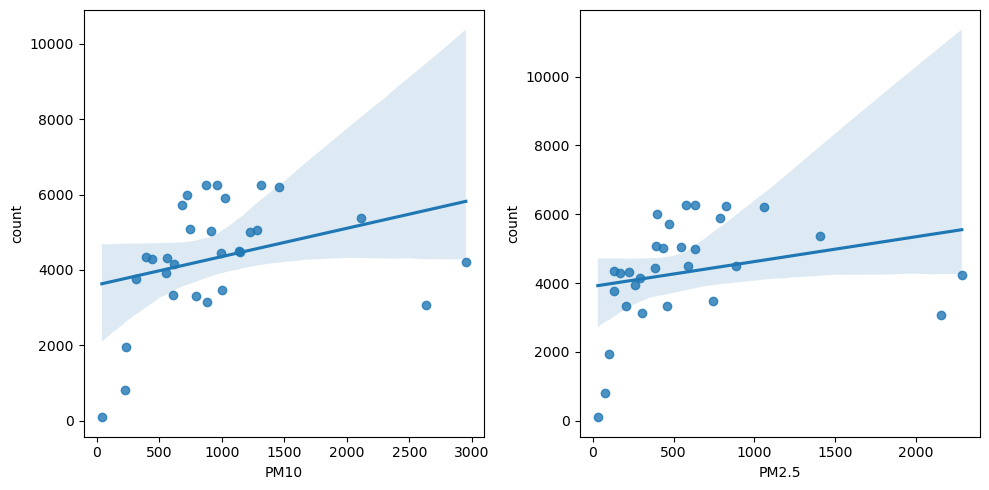

In [210]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.regplot(x = "PM10", y = "count", data = nov_pm10)
plt.subplot(1, 2, 2)
sns.regplot(x = "PM2.5", y = "count", data = nov_pm25)
plt.tight_layout()
plt.show()

In [211]:
import scipy.stats as spst
result1 = spst.pearsonr(nov_pm10["PM10"], nov_pm10["count"])
result2 = spst.pearsonr(nov_pm25["PM2.5"], nov_pm25["count"])
print(f"PM10 : {result1}")
print(f"PM25 : {result2}")

PM10 : PearsonRResult(statistic=0.3226642943403158, pvalue=0.0820228472788569)
PM25 : PearsonRResult(statistic=0.25776504148553236, pvalue=0.16906457747774098)


#### 11월 미세먼지, 초미세먼지 수치와 따릉이 대여수의 상관관계는 없다

## 결론 : 미세먼지, 초미세먼지 수치와 따릉이 대여수는 7월빼고 상관관계가 없다?

<hr>

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [16]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [17]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

#### <font color='green'>2. 약한 관계의 변수</font>


#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### [Step6] Insight 도출

In [321]:
bike.corr()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,day,month
hour,1.000000,0.044216,0.049832,0.226092,0.190606,-0.000085,0.220301,-0.304287,0.088881,0.586435,0.000067,-0.001495
PM10,0.044216,1.000000,0.684193,0.008393,-0.127034,-0.095161,0.043421,-0.088692,-0.289495,0.028282,-0.028319,-0.118251
PM2.5,0.049832,0.684193,1.000000,0.053838,-0.110659,-0.133784,-0.136576,-0.035074,-0.433992,0.037130,0.049894,-0.027333
ozone,0.226092,0.008393,0.053838,1.000000,0.532444,-0.078719,0.349024,-0.404614,0.138263,0.316083,0.004927,-0.242467
temperature,0.190606,-0.127034,-0.110659,0.532444,1.000000,-0.040205,0.051311,-0.092162,0.143919,0.277169,-0.036257,-0.179312
precipitation,-0.000085,-0.095161,-0.133784,-0.078719,-0.040205,1.000000,0.045742,0.384594,-0.494057,-0.269859,-0.042026,-0.058661
windspeed,0.220301,0.043421,-0.136576,0.349024,0.051311,0.045742,1.000000,-0.292127,0.084418,0.223722,-0.083935,-0.122908
humidity,-0.304287,-0.088692,-0.035074,-0.404614,-0.092162,0.384594,-0.292127,1.000000,-0.487472,-0.478955,-0.026675,0.155531
visibility,0.088881,-0.289495,-0.433992,0.138263,0.143919,-0.494057,0.084418,-0.487472,1.000000,0.265828,0.023754,0.020918
count,0.586435,0.028282,0.037130,0.316083,0.277169,-0.269859,0.223722,-0.478955,0.265828,1.000000,-0.012856,0.002183


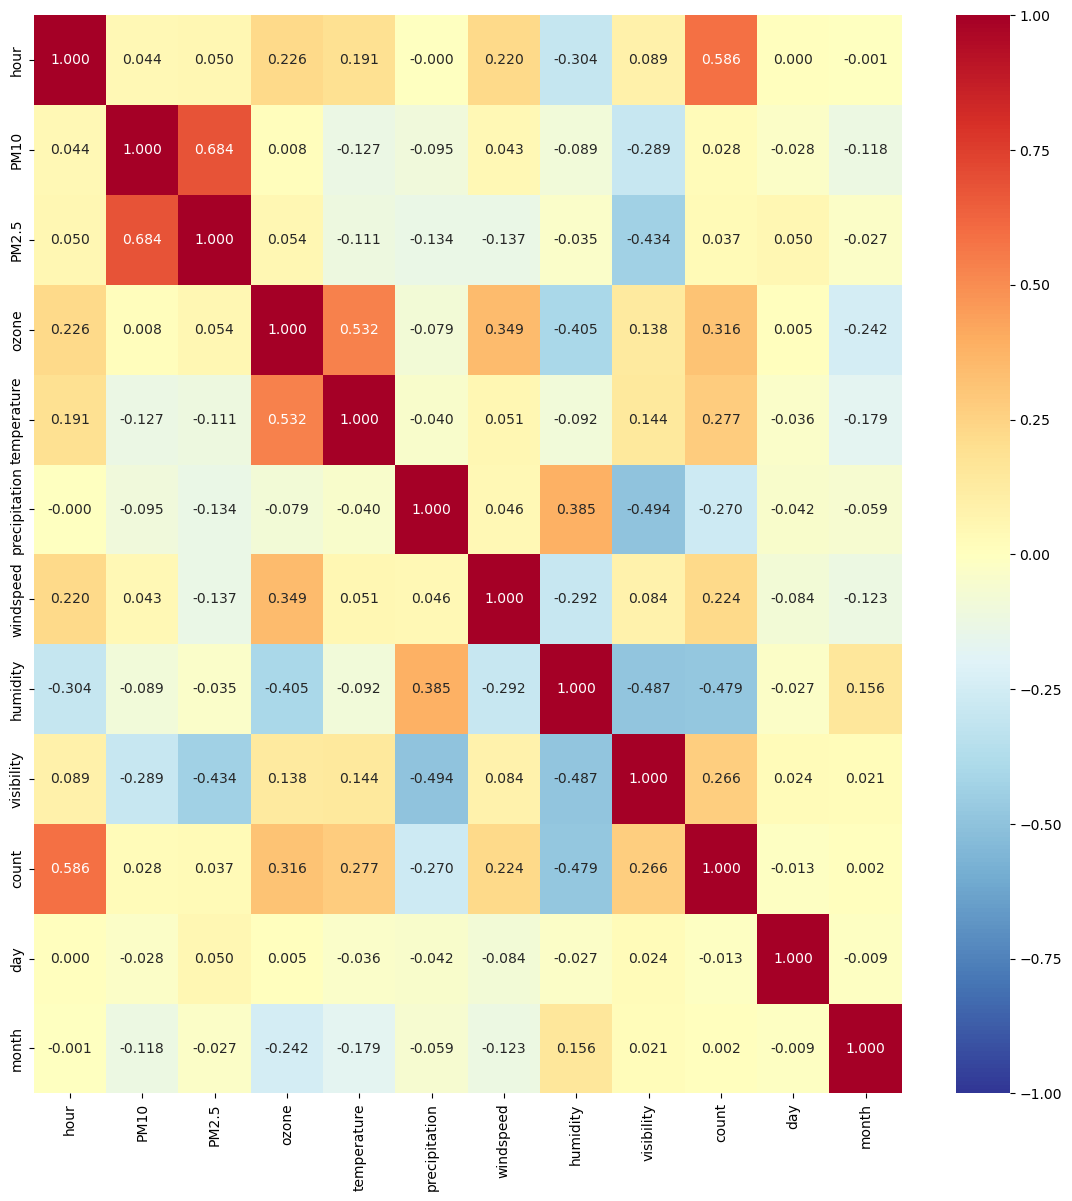

In [322]:
plt.figure(figsize = (14, 14))
sns.heatmap(bike.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

In [323]:
import scipy.stats as spst
result1 = spst.pearsonr(bike["hour"], bike["count"])
print(f"hour : {result1}")

hour : PearsonRResult(statistic=0.5864350283919393, pvalue=0.0)
